In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Finplat\data\processed\AAPL_processed_clean.csv',parse_dates=['Date'], index_col='Date')
print(df.shape)
print(f"Date range: {df.index.min()} to {df.index.max()}")

(502, 58)
Date range: 2023-03-15 00:00:00-04:00 to 2025-03-14 00:00:00-04:00


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_12,EMA_26,RSI_14,...,Weighted_Sentiment,MA,Adaptive_BB_Middle,Adaptive_BB_Std,Adaptive_BB_Upper,Adaptive_BB_Lower,BB_Width,TR,Adaptive_ATR,Adaptive_ATR_Pct
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.0,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,197.609508,199.447246,195.935075,197.812201,5.664128e+07,0.003904,0.0,196.993966,195.814136,54.431685,...,0.000179,186.367567,196.502325,4.830618,206.163558,186.841092,0.097172,3.890330,3.834521,1.922742
std,26.720724,27.052654,26.293617,26.727845,2.472314e+07,0.030718,0.0,26.508894,26.125123,18.223943,...,0.003588,16.016648,26.291619,2.138803,28.643895,24.466737,0.038745,2.291197,1.186312,0.447605
min,149.680500,151.719900,148.423200,151.462500,2.323470e+07,0.000000,0.0,151.462500,151.462500,7.864700,...,0.000000,151.462500,151.462500,1.514600,154.491800,148.433300,0.040000,1.053700,2.113700,1.184000
25%,175.249825,176.965500,173.855750,175.453600,4.382558e+07,0.000000,0.0,175.439075,175.790275,41.875450,...,0.000000,178.372700,174.424575,3.153475,183.867625,166.120300,0.068300,2.465725,2.978850,1.612800
50%,189.154300,190.438300,188.207350,189.303650,5.137380e+07,0.000000,0.0,187.599750,186.840150,56.153650,...,0.000000,182.370850,187.571050,4.279300,195.792200,179.067350,0.088400,3.311400,3.407150,1.834150
75%,224.402850,226.326900,222.512025,224.248850,6.221395e+07,0.000000,0.0,224.396275,222.193750,67.734750,...,0.000000,194.513975,223.603325,6.179025,233.468350,215.082775,0.118600,4.531975,4.378600,2.146575
max,257.906400,259.814300,257.347000,258.735500,3.186799e+08,0.250000,0.0,252.086100,246.669500,96.163000,...,0.079800,227.350100,249.710400,11.913600,264.982300,240.058100,0.206200,23.780100,7.639300,3.643300


In [5]:
# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])  

Series([], dtype: int64)


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Histogram',
       'ROC_10', 'S&P500_Price', 'S&P500_Return', 'S&P500_Correlation',
       'S&P500_RelativeStrength', 'Beta_S&P500', 'NASDAQ_Price',
       'NASDAQ_Return', 'NASDAQ_Correlation', 'NASDAQ_RelativeStrength',
       'Beta_NASDAQ', 'DowJones_Price', 'DowJones_Return',
       'DowJones_Correlation', 'DowJones_RelativeStrength', 'Beta_DowJones',
       'Gold_Price', 'Gold_Return', 'Gold_Correlation',
       'Gold_RelativeStrength', 'Oil_Price', 'Oil_Return', 'Oil_Correlation',
       'Oil_RelativeStrength', 'VIX_Price', 'VIX_Return', 'VIX_Correlation',
       'VIX_RelativeStrength', 'Avg_Market_Correlation', 'PE_Ratio', 'EPS',
       'ROE', 'Sentiment_Score', 'News_Volume', 'Sentiment_Relevance',
       'Weighted_Sentiment', 'MA', 'Adaptive_BB_Middle', 'Adaptive_BB_Std',
       'Adaptive_BB_Upper', 'Adaptive_BB_Lower', 'BB_Width', 'TR

In [7]:
# Group the columns into groups

core = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

trend = ['EMA_12', 'EMA_26','MA', 'Adaptive_BB_Middle']

momentum = ['RSI_14', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'ROC_10']

volatility = ['Adaptive_BB_Std', 'Adaptive_BB_Upper', 'Adaptive_BB_Lower', 'BB_Width', 'TR', 'Adaptive_ATR', 'Adaptive_ATR_Pct']

price_returns = ['S&P500_Price', 'S&P500_Return','NASDAQ_Price', 'NASDAQ_Return', 'DowJones_Price', 'DowJones_Return','Gold_Price', 'Gold_Return',
                 'Oil_Price', 'Oil_Return', 'VIX_Price', 'VIX_Return']

correlation_beta = ['S&P500_Correlation', 'NASDAQ_Correlation', 'DowJones_Correlation', 'Gold_Correlation', 'Oil_Correlation', 'VIX_Correlation', 'Avg_Market_Correlation',
                     'Beta_S&P500', 'Beta_NASDAQ', 'Beta_DowJones']

relative = ['S&P500_RelativeStrength', 'NASDAQ_RelativeStrength', 'DowJones_RelativeStrength', 'Gold_RelativeStrength', 'Oil_RelativeStrength', 'VIX_RelativeStrength']

fundamental_indicators = ['PE_Ratio', 'Forward_PE', 'PEG_Ratio', 'Price_to_Book', 'EPS', 'Profit_Margin', 'ROE', 'ROA', 'Debt_to_Equity', 
                          'Current_Ratio', 'Quick_Ratio', 'Dividend_Yield', 'Fundamental_Score']

sentiment = ['Sentiment_Score', 'News_Volume', 'Sentiment_Relevance', 'Weighted_Sentiment']

In [8]:
# Checking if all columns are there in one of the groups

groups = [core, trend, momentum, volatility, price_returns, correlation_beta, relative, fundamental_indicators, sentiment]
columns = 0
for group in groups:
    columns+=len(group)
columns

68

1. Core features

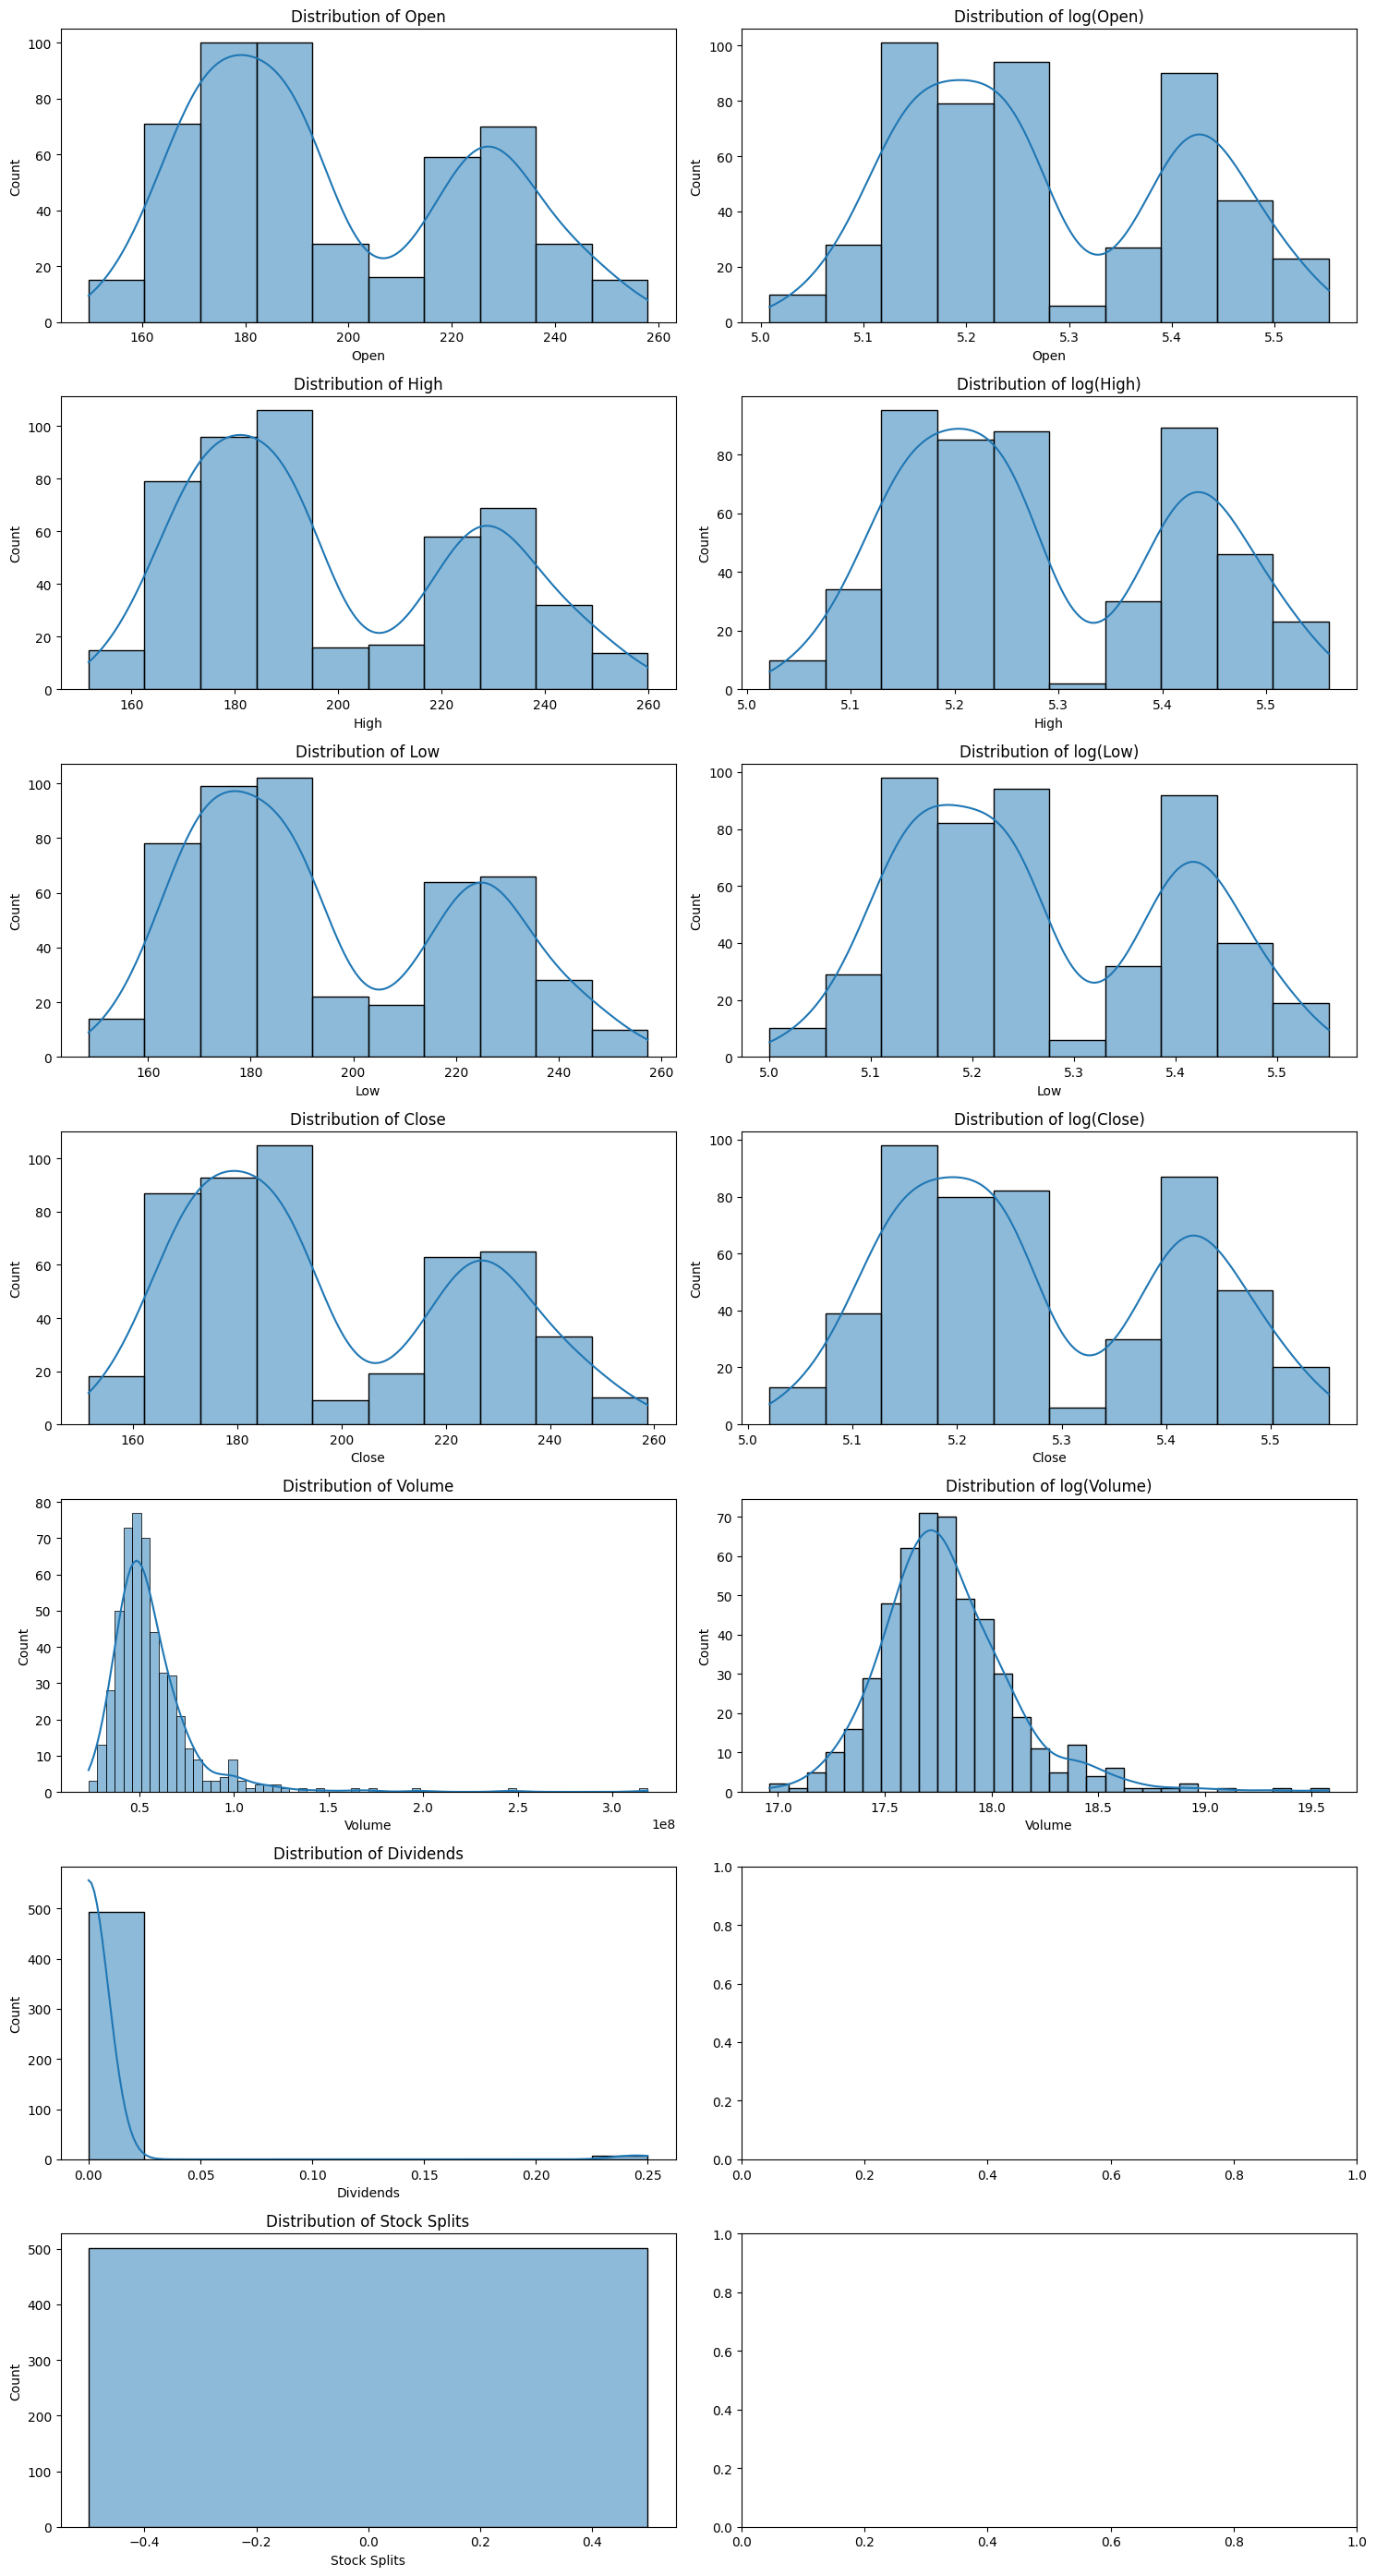

In [9]:
columns = core

fig, axes = plt.subplots(len(columns), 2, figsize=(15, 4*len(columns)))
    
for i, col in enumerate(columns):
    # Original data distribution
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
        
    # Try a log transformation and plot that too
    if col in ['Volume', 'Close', 'Open', 'High', 'Low']:
        # Avoid log(0) issues
        log_data = np.log(df[col].replace(0, np.nan).dropna())
        sns.histplot(log_data, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Distribution of log({col})')
    
plt.tight_layout()
plt.show()

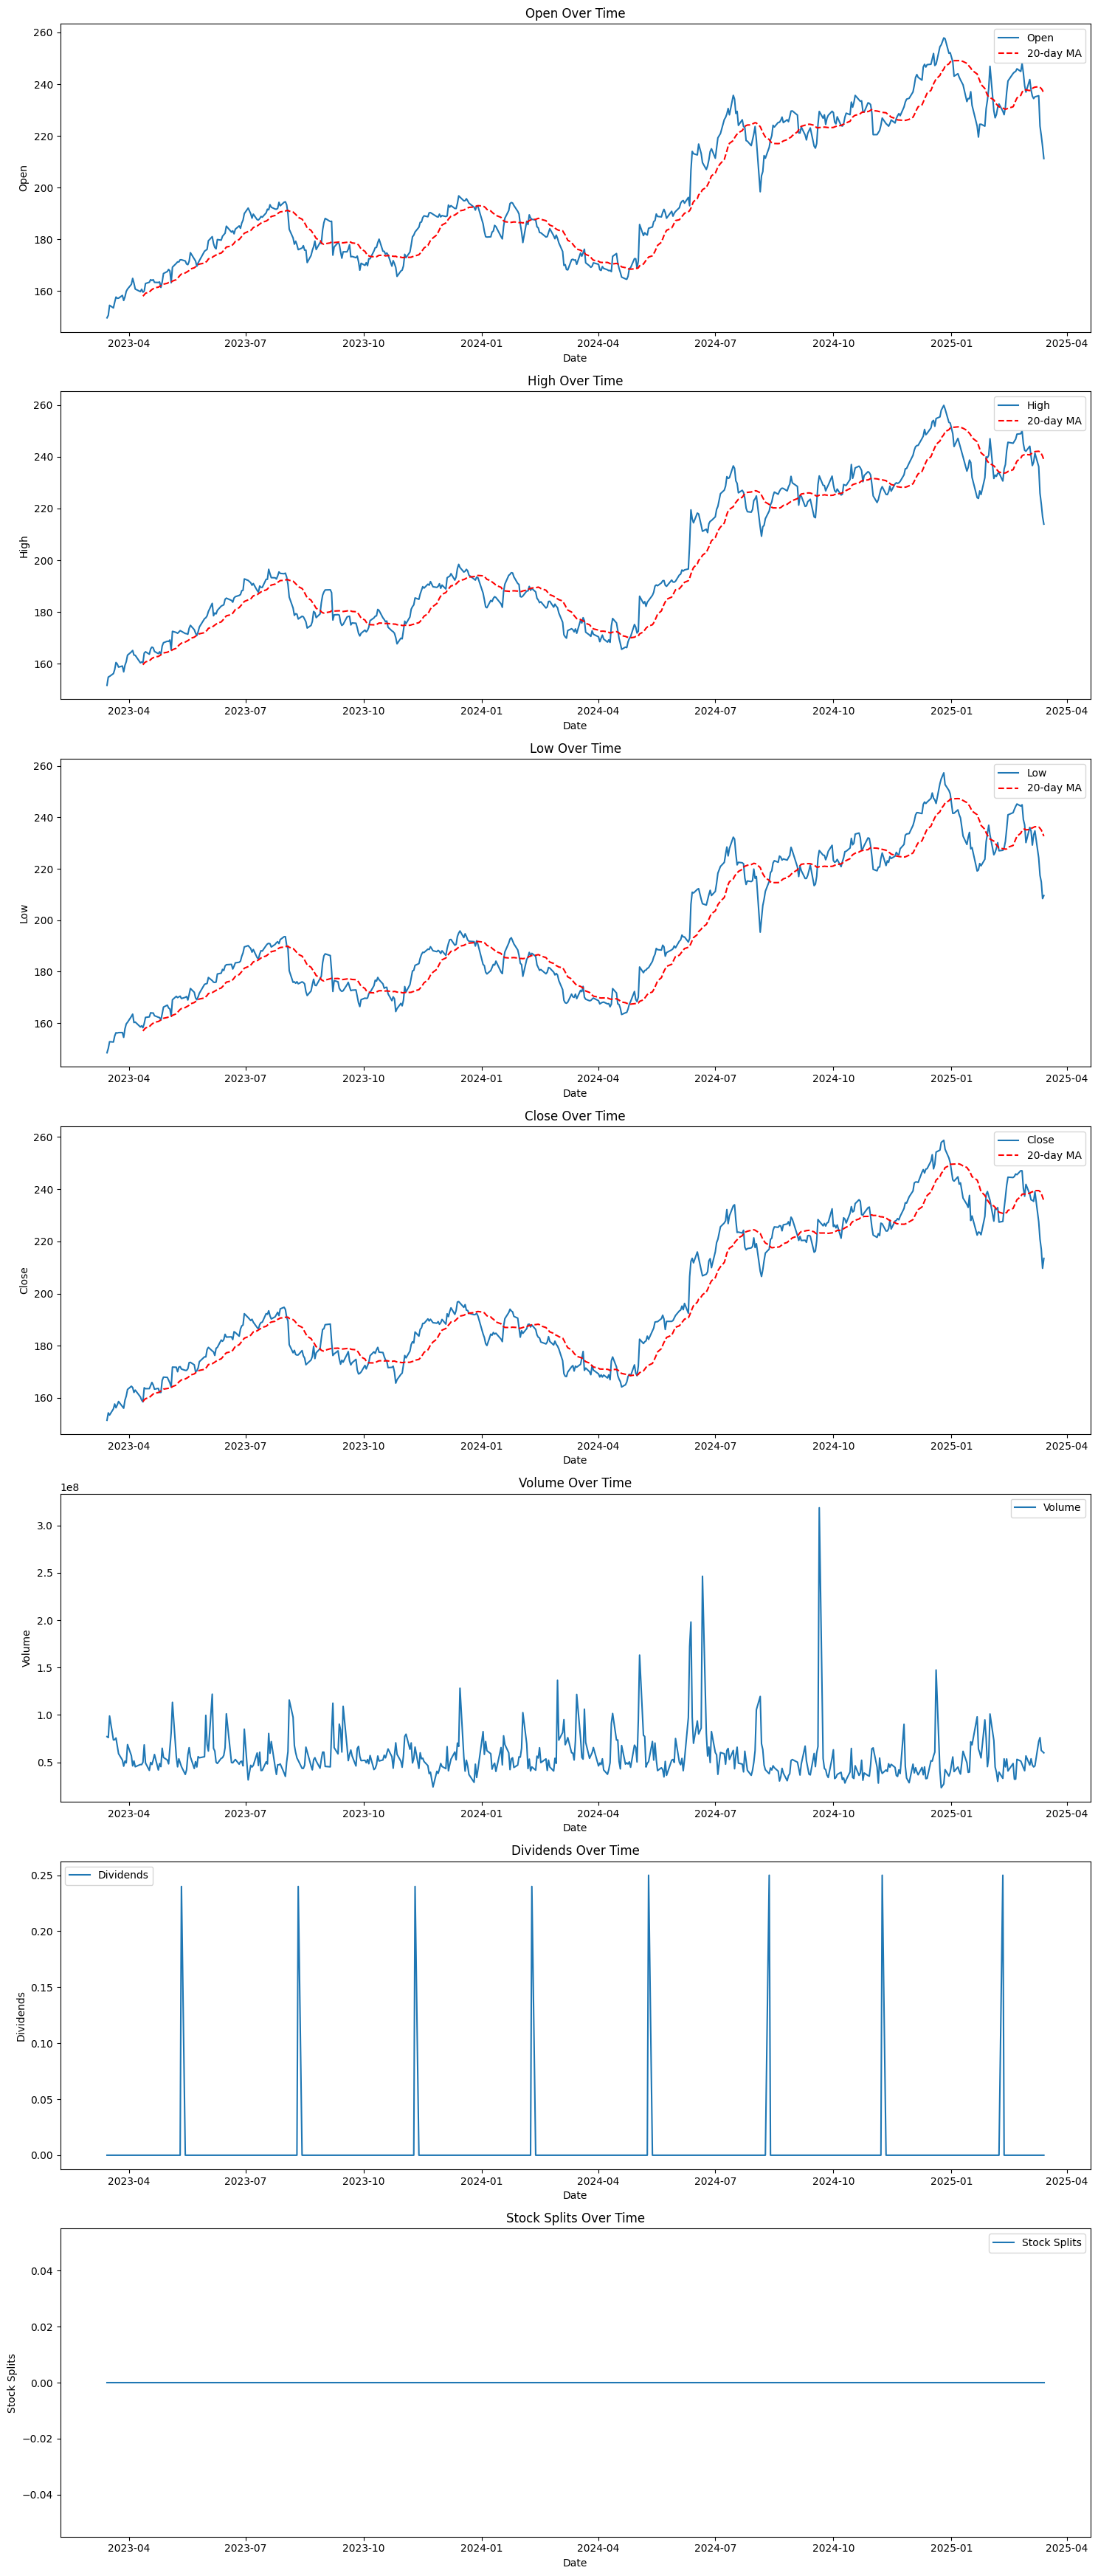

In [10]:
columns = core

fig, axes = plt.subplots(len(columns), 1, figsize=(15, 5*len(columns)))
    
if len(columns) == 1:
    axes = [axes]  # Make sure axes is always a list
        
for i, col in enumerate(columns):

    # Original time series
    axes[i].plot(df.index, df[col], label=col)
    axes[i].set_title(f'{col} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].legend()
        
    # Add some additional visual aids
    if col in ['Close', 'Open', 'High', 'Low']:
         
           # Add rolling mean
         rolling_mean = df[col].rolling(window=20).mean()
         axes[i].plot(df.index, rolling_mean, 'r--', label='20-day MA')
         axes[i].legend()
    
plt.tight_layout()
plt.show()

In [11]:
df['Stock Splits'].value_counts()

Stock Splits
0.0    502
Name: count, dtype: int64

In [12]:
# Drop Stock_Splits as it's only one value
df.drop('Stock Splits',axis=1,inplace=True)

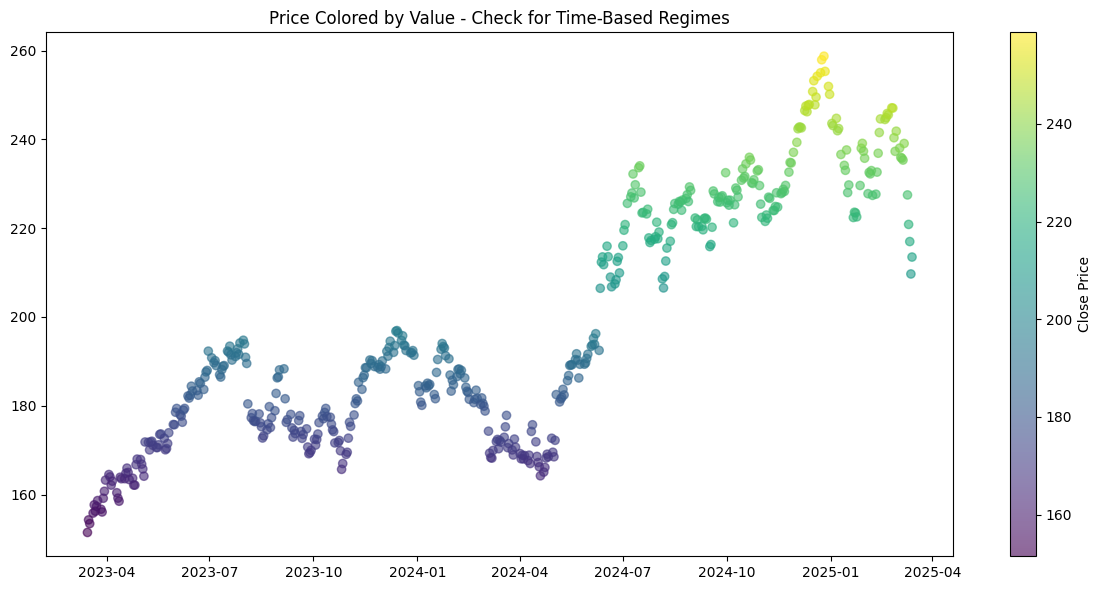

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'], c=df['Close'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Close Price')
plt.title('Price Colored by Value - Check for Time-Based Regimes')
plt.tight_layout()

In [14]:
df['returns'] = df['Close'].pct_change()
df['log_returns'] = np.log(df['Close']).diff()

Text(0.5, 1.0, 'Returns')

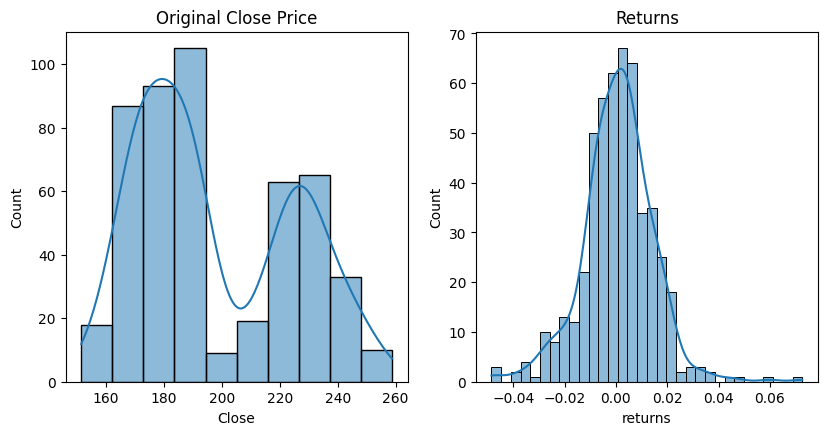

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Close'].dropna(), kde=True)
plt.title('Original Close Price')

plt.subplot(2, 3, 2)
sns.histplot(df['returns'].dropna(), kde=True)
plt.title('Returns')

In [16]:
df['open_to_close']= (df['Close'] - df['Open']) / df['Open']
df['daily_volatility'] = (df['High'] - df['Low']) / df['Close']
df['high_to_close'] = df['High'] / df['Close']
df['valuation'] = df['Close'] * df['Volume']


In [17]:
df.drop(['Open','High'],axis=1,inplace=True)

<Axes: xlabel='valuation', ylabel='Density'>

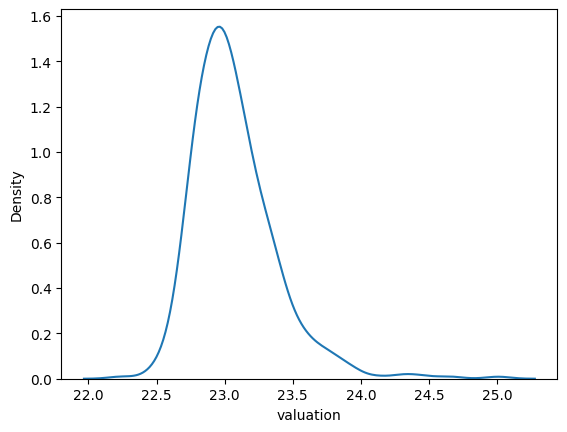

In [18]:
sns.kdeplot(np.log(df['valuation']))

In [19]:
df['log_valuation'] = np.log(df['valuation'])

In [20]:
df.drop('valuation',axis=1,inplace=True)

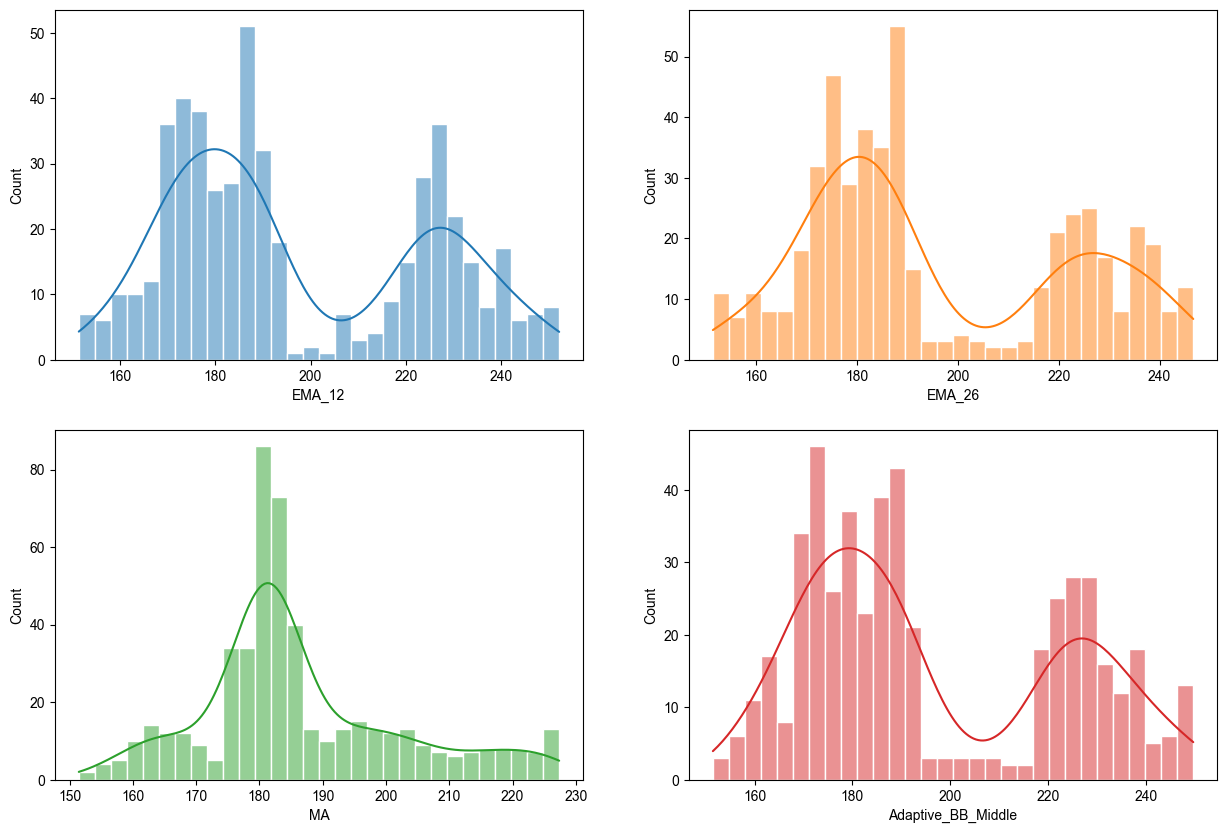

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2x2 array for easier indexing

# Set a style
sns.set_style('whitegrid')

# Create a histogram for each trend feature
for i, feature in enumerate(trend):
    # Get the current axis
    ax = axes[i]
    
    # Create histogram with KDE (Kernel Density Estimate)
    sns.histplot(
        df[feature].dropna(),  # Drop any NaN values
        kde=True,              # Add density curve
        bins=30,               # Number of bins
        ax=ax,                 # Current subplot
        color=f'C{i}'          # Use different colors
    )
    

<Axes: xlabel='Adaptive_BB_Middle', ylabel='Density'>

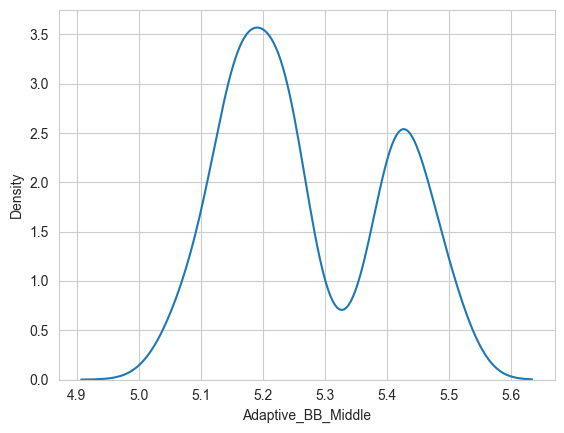

In [22]:
sns.kdeplot(np.log(df['Adaptive_BB_Middle']))

In [23]:
# Percentage changes (returns)
df['EMA_12_pct'] = df['EMA_12'].pct_change()
df['EMA_26_pct'] = df['EMA_26'].pct_change()
df['Adaptive_BB_Middle_pct'] = df['Adaptive_BB_Middle'].pct_change()

<Axes: xlabel='Adaptive_BB_Middle_pct', ylabel='Count'>

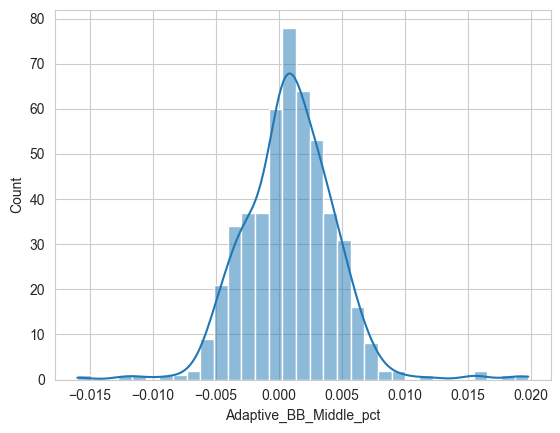

In [24]:
sns.histplot(df['Adaptive_BB_Middle_pct'],kde=True)

In [25]:
df.drop(['Adaptive_BB_Middle','EMA_12','EMA_26'],axis=1,inplace=True)
df['EMA_12_pct'] = df['EMA_12_pct'].fillna(0)

In [26]:
df['EMA_26_pct'] = df['EMA_26_pct'].fillna(0)
df['Adaptive_BB_Middle_pct'] = df['Adaptive_BB_Middle_pct'].fillna(0)

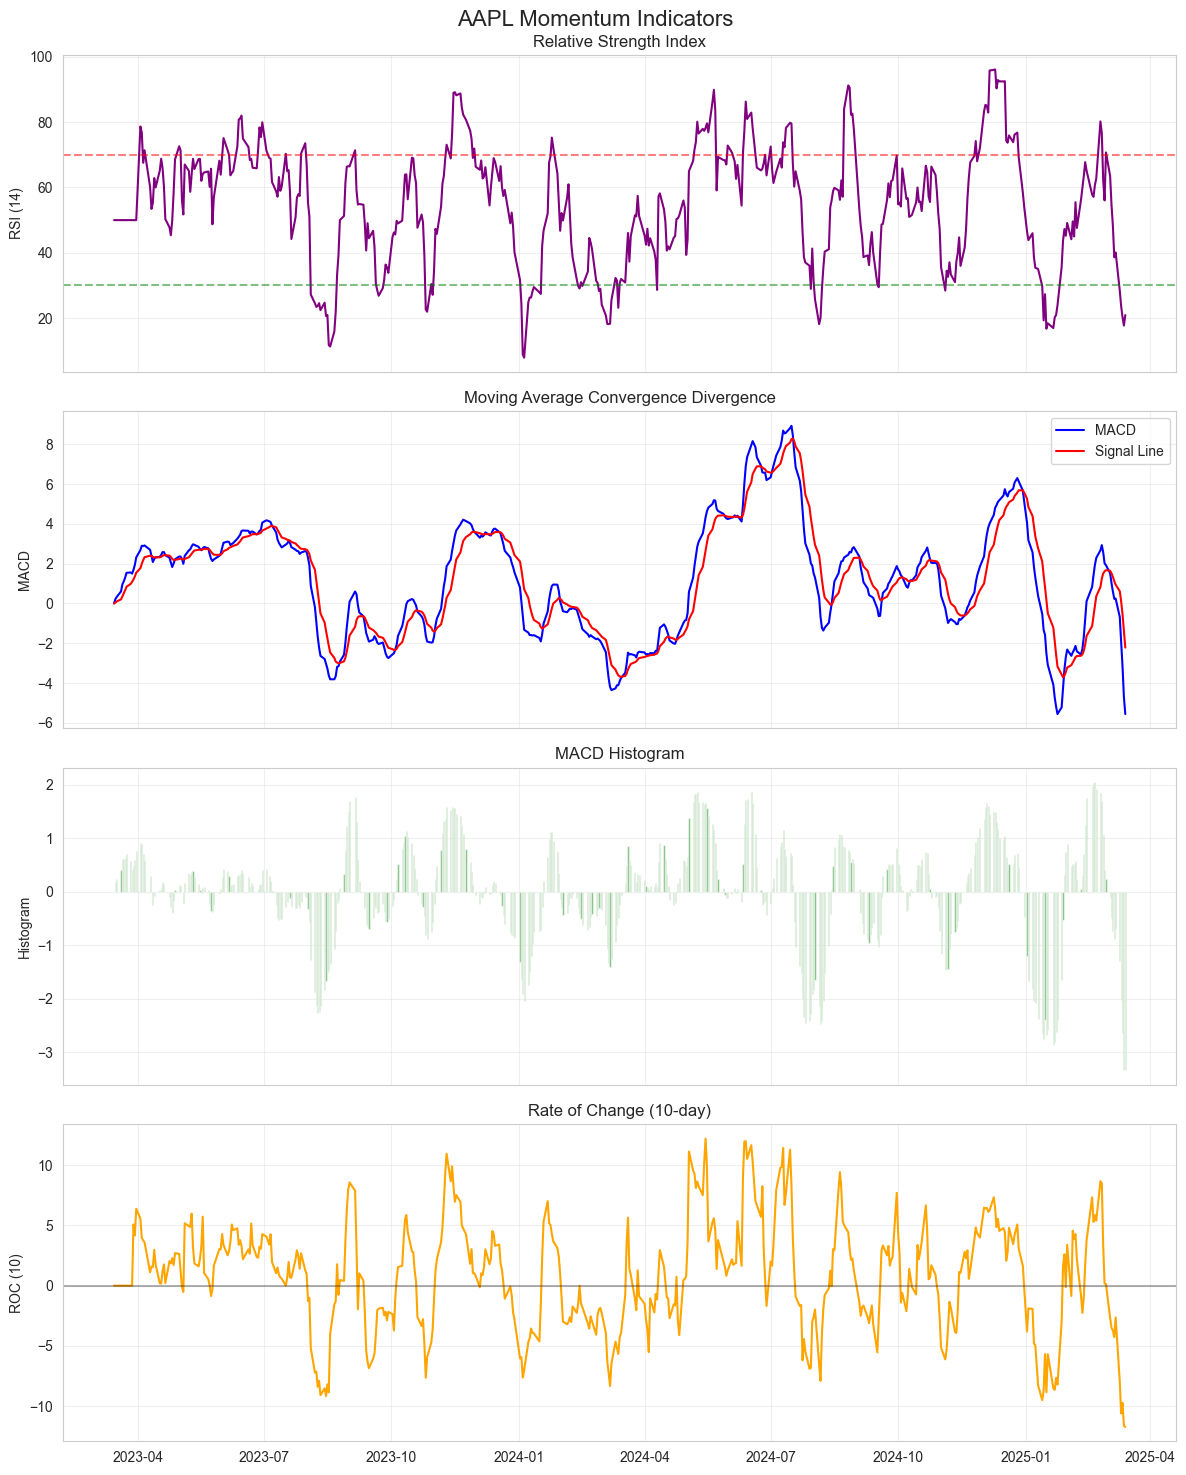

In [27]:
fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)
fig.suptitle('AAPL Momentum Indicators', fontsize=16)

# Plot each indicator
# RSI
axes[0].plot(df.index, df['RSI_14'], color='purple')
axes[0].axhline(y=70, color='r', linestyle='--', alpha=0.5)  # Overbought line
axes[0].axhline(y=30, color='g', linestyle='--', alpha=0.5)  # Oversold line
axes[0].set_ylabel('RSI (14)')
axes[0].set_title('Relative Strength Index')
axes[0].grid(True, alpha=0.3)

# MACD
axes[1].plot(df.index, df['MACD'], color='blue', label='MACD')
axes[1].plot(df.index, df['MACD_Signal'], color='red', label='Signal Line')
axes[1].set_ylabel('MACD')
axes[1].set_title('Moving Average Convergence Divergence')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# MACD Histogram
axes[2].bar(df.index, df['MACD_Histogram'], color='green', alpha=0.6)
axes[2].set_ylabel('Histogram')
axes[2].set_title('MACD Histogram')
axes[2].grid(True, alpha=0.3)

# Rate of Change (ROC)
axes[3].plot(df.index, df['ROC_10'], color='orange')
axes[3].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[3].set_ylabel('ROC (10)')
axes[3].set_title('Rate of Change (10-day)')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

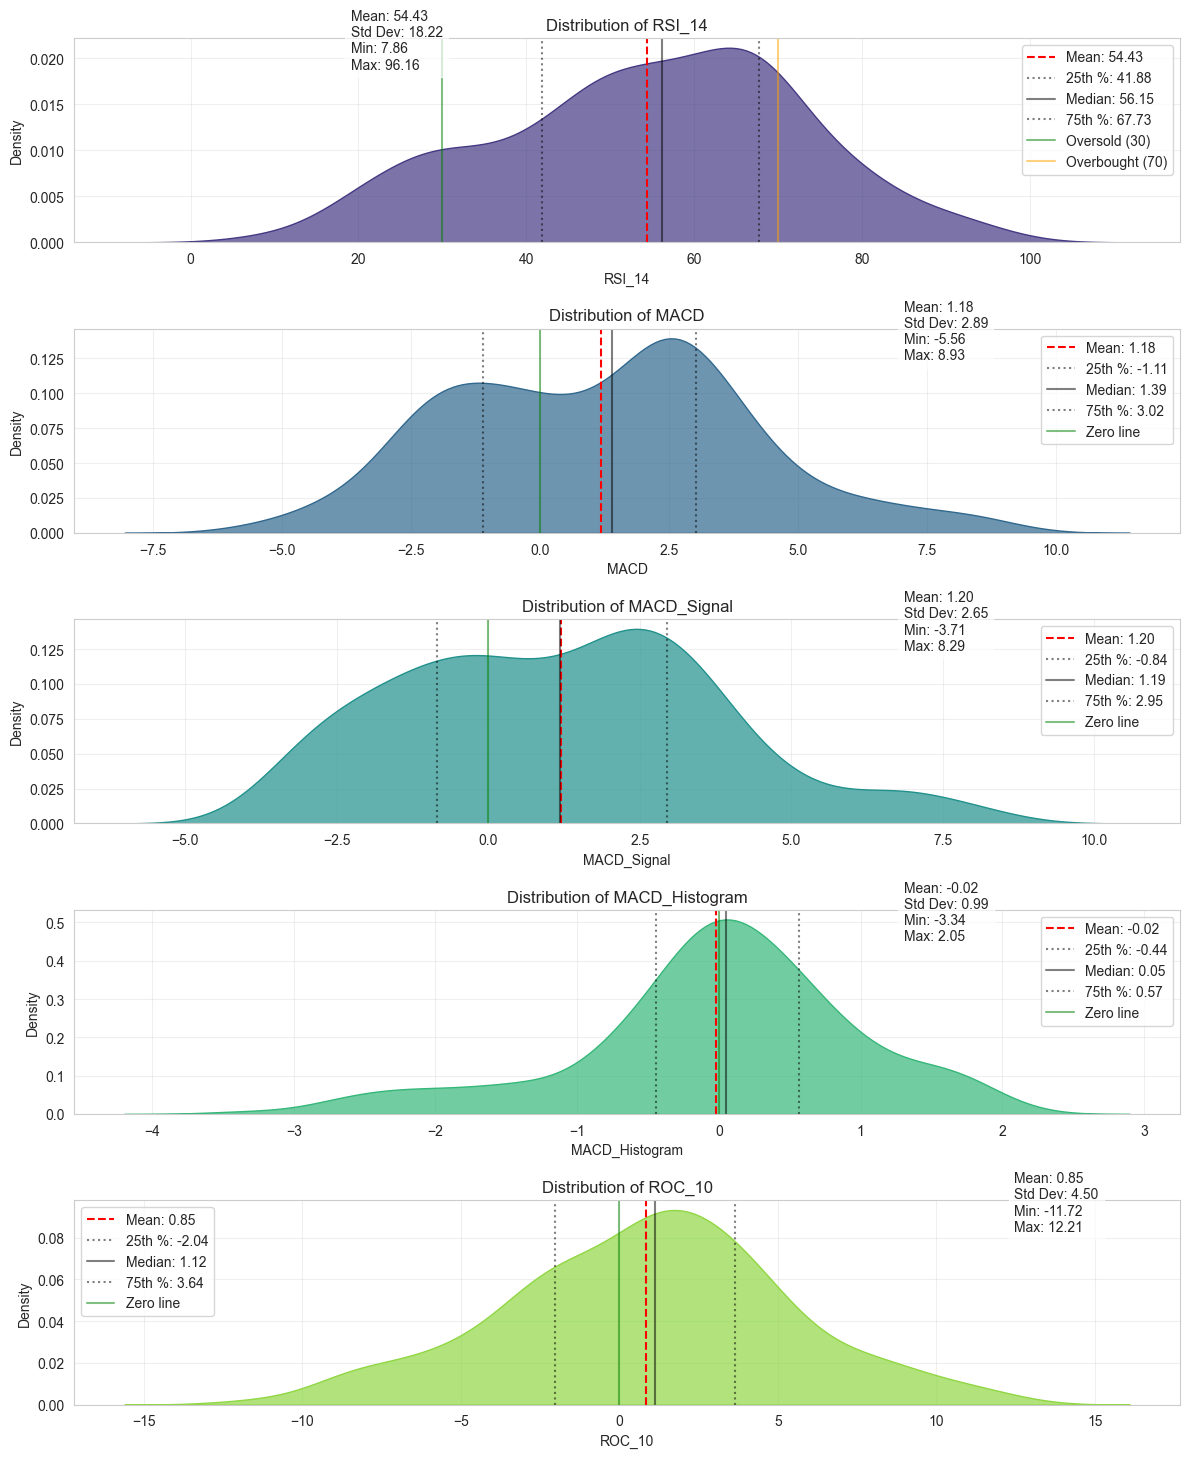

In [28]:
ig, axes = plt.subplots(len(momentum), 1, figsize=(12, 15), sharex=False)
fig.suptitle('Distribution of Momentum Indicators', fontsize=16)

# Set a color palette
colors = sns.color_palette("viridis", len(momentum))

for i, feature in enumerate(momentum):
    # Clean data (remove NaN values and infinite values)
    data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Create the KDE plot
    sns.kdeplot(data, ax=axes[i], fill=True, color=colors[i], alpha=0.7)
    
    # Add a vertical line at the mean
    axes[i].axvline(data.mean(), color='r', linestyle='--', label=f'Mean: {data.mean():.2f}')
    
    # Add vertical lines at key percentiles (25th, 50th, 75th)
    axes[i].axvline(data.quantile(0.25), color='k', linestyle=':', alpha=0.5, 
                   label=f'25th %: {data.quantile(0.25):.2f}')
    axes[i].axvline(data.median(), color='k', linestyle='-', alpha=0.5, 
                   label=f'Median: {data.median():.2f}')
    axes[i].axvline(data.quantile(0.75), color='k', linestyle=':', alpha=0.5, 
                   label=f'75th %: {data.quantile(0.75):.2f}')
    
    # Add feature-specific reference lines where appropriate
    if feature == 'RSI_14':
        axes[i].axvline(30, color='g', linestyle='-', alpha=0.5, label='Oversold (30)')
        axes[i].axvline(70, color='orange', linestyle='-', alpha=0.5, label='Overbought (70)')
    elif 'MACD' in feature:
        axes[i].axvline(0, color='g', linestyle='-', alpha=0.5, label='Zero line')
    elif feature == 'ROC_10':
        axes[i].axvline(0, color='g', linestyle='-', alpha=0.5, label='Zero line')
    
    # Customize the plot
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(feature)
    axes[i].legend(loc='best')
    axes[i].grid(True, alpha=0.3)
    
    # Add some basic statistics as text
    stats_text = (f"Mean: {data.mean():.2f}\n"
                 f"Std Dev: {data.std():.2f}\n"
                 f"Min: {data.min():.2f}\n"
                 f"Max: {data.max():.2f}")
    
    # Position text in the upper right, but adjusting for each plot as needed
    text_x = 0.85
    text_y = 0.85
    if feature == 'RSI_14':  # Adjust for RSI which has a bounded range
        text_x = 0.25
    elif 'MACD' in feature:  # Adjust for MACD which can be wide
        text_x = 0.75
    
    axes[i].text(text_x, text_y, stats_text, transform=axes[i].transAxes,
                bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()



In [29]:
df.drop('MACD_Histogram',axis=1,inplace=True)

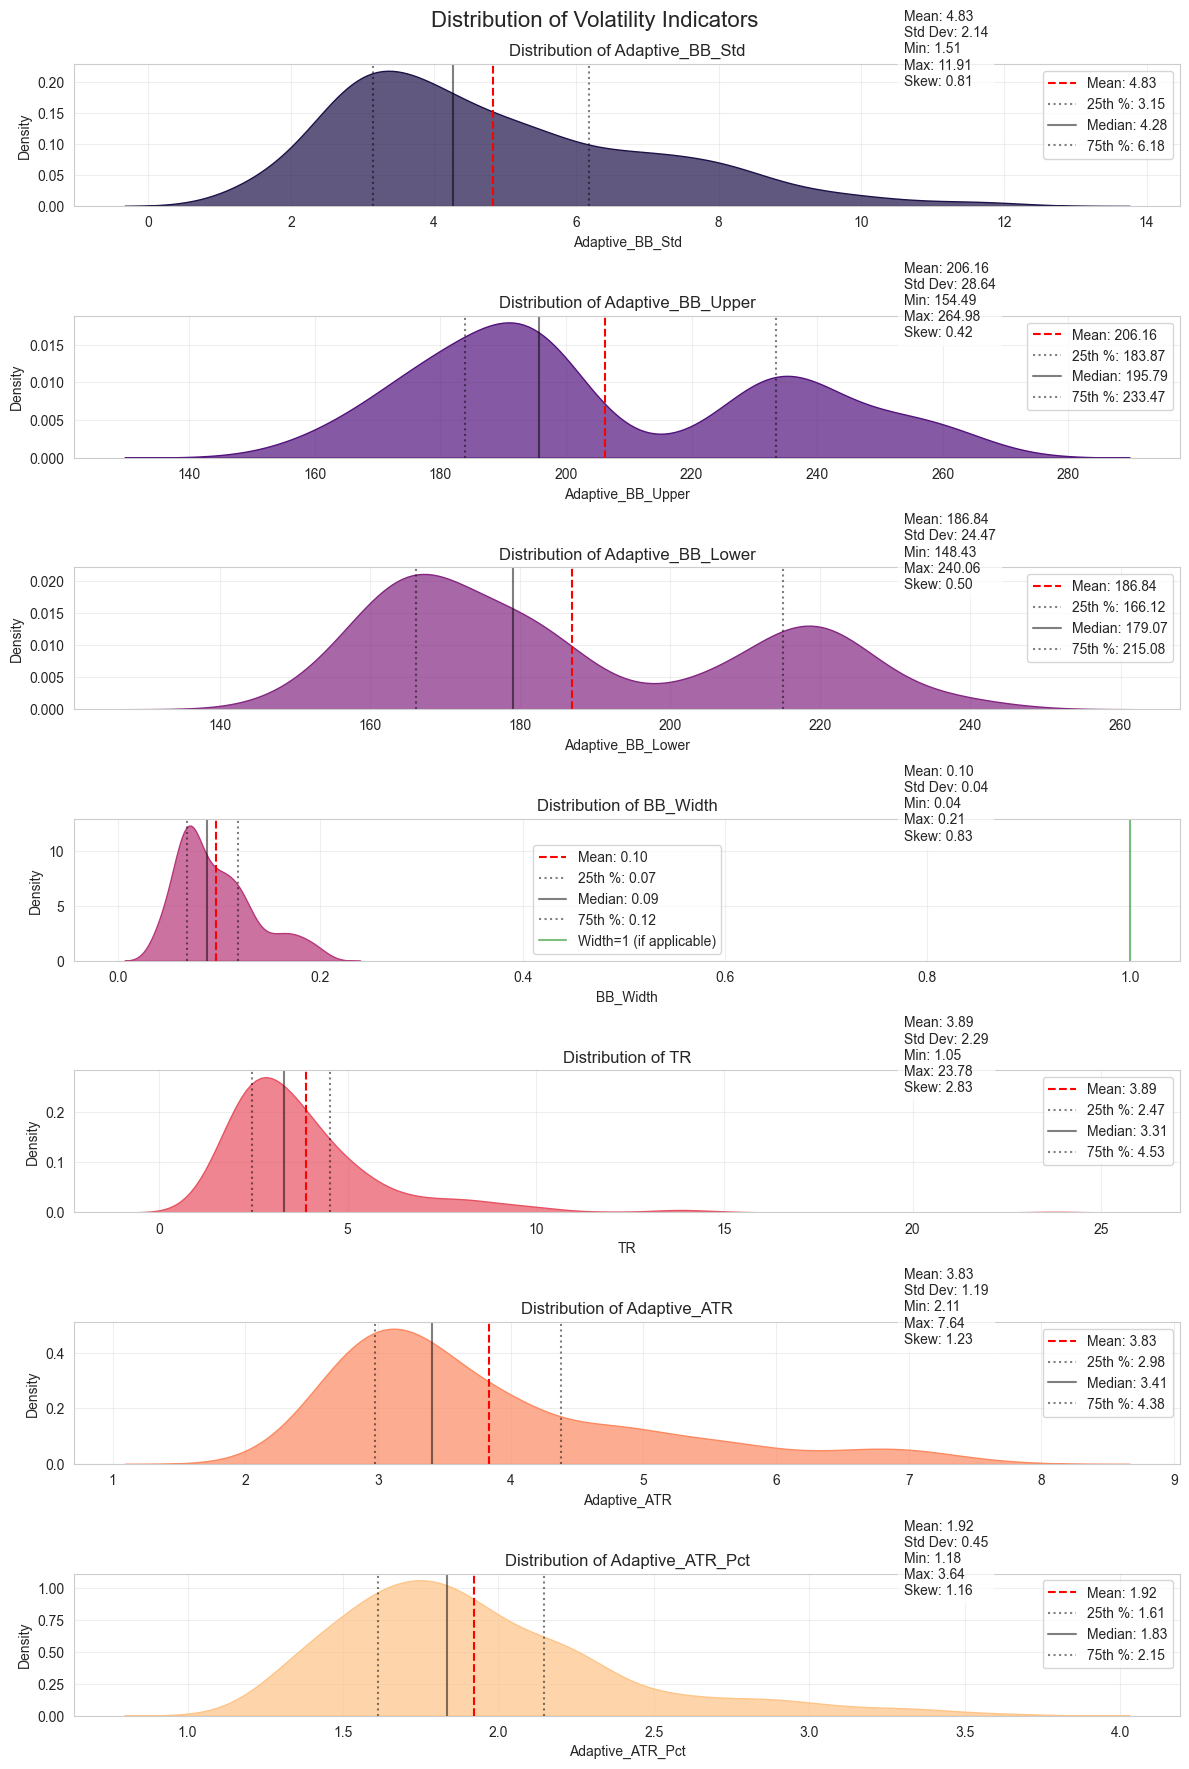

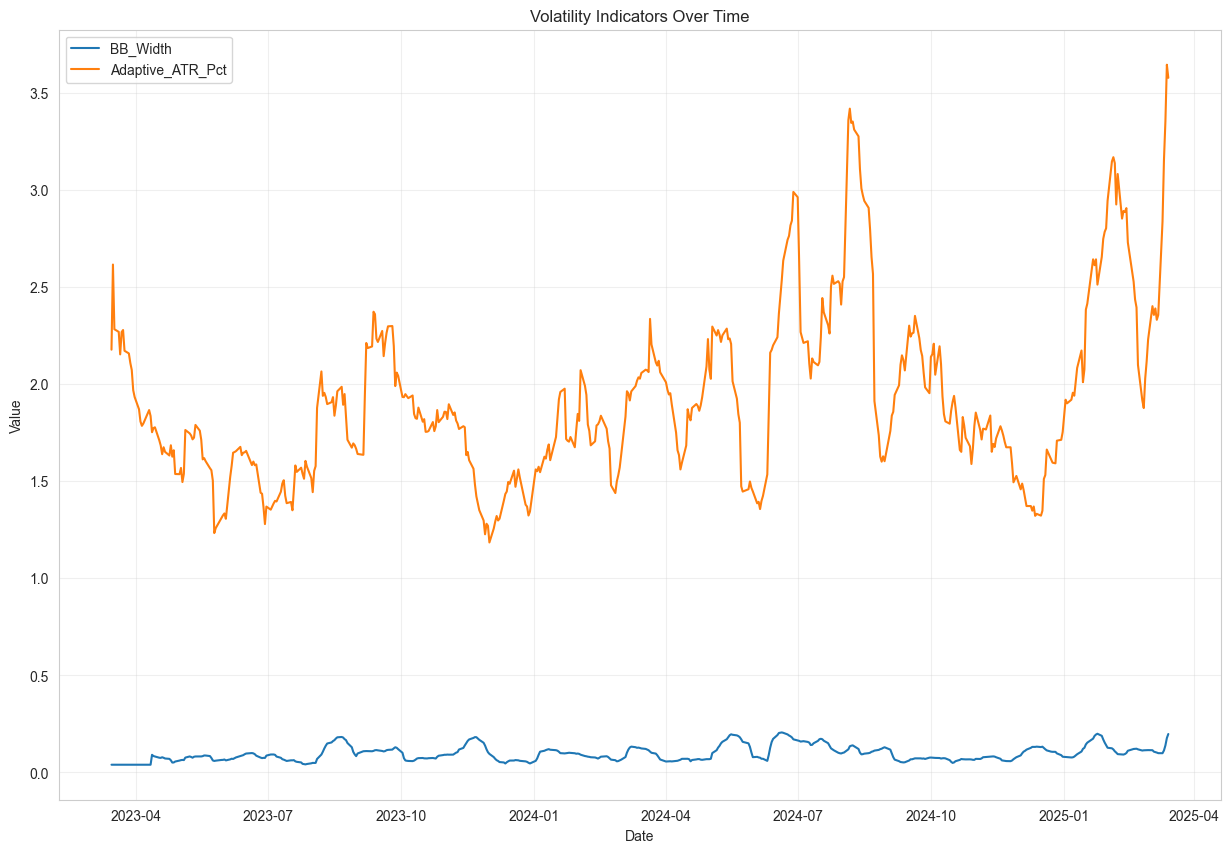

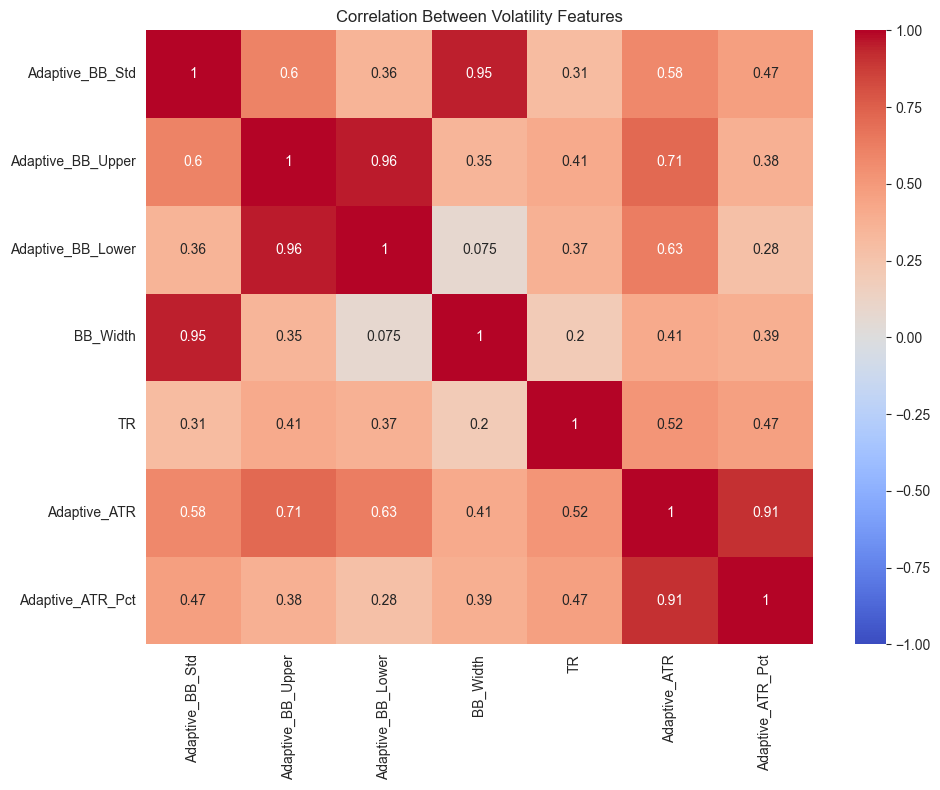

<Figure size 1200x1000 with 0 Axes>

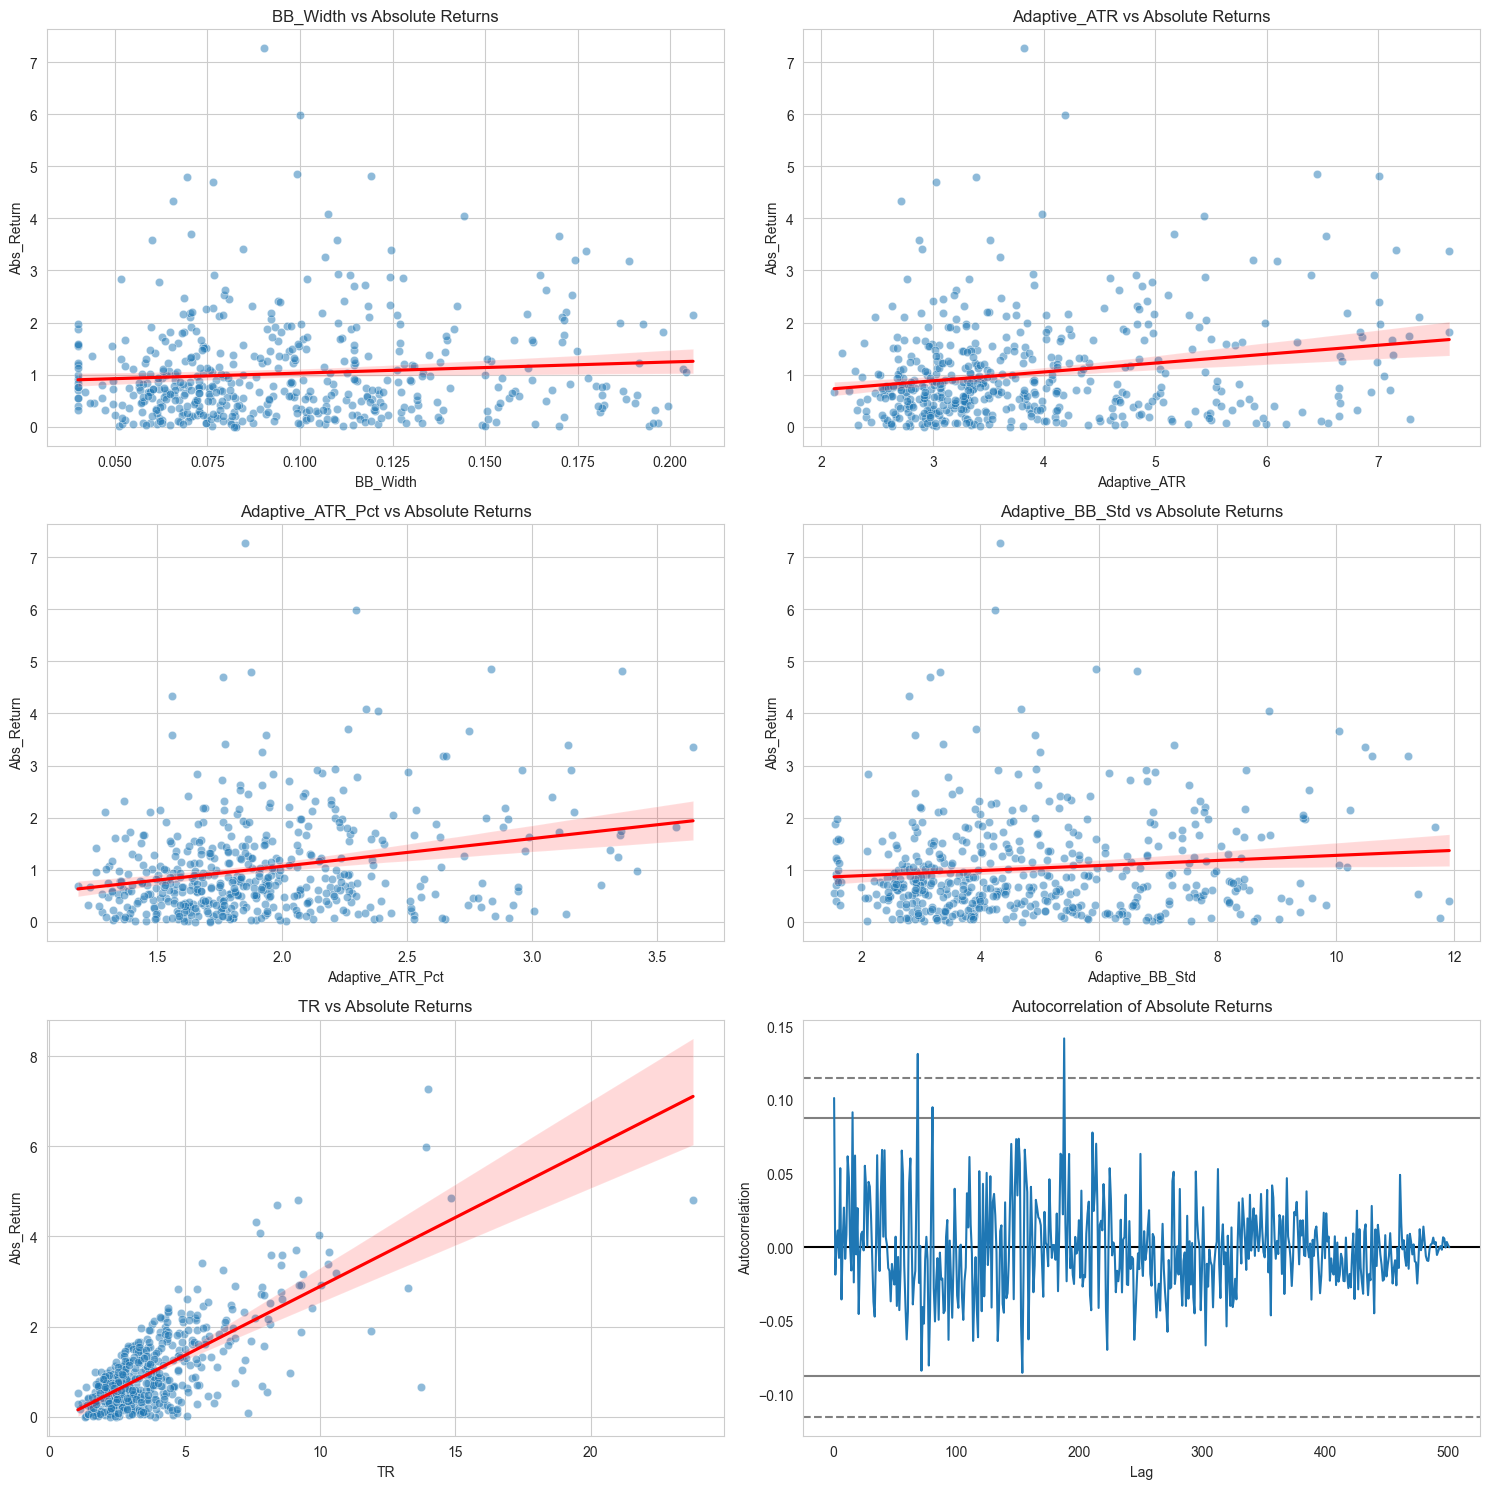

In [30]:

# Create a figure with subplots
fig, axes = plt.subplots(len(volatility), 1, figsize=(12, 18), sharex=False)
fig.suptitle('Distribution of Volatility Indicators', fontsize=16)

# Set a color palette - using a different one from momentum for distinction
colors = sns.color_palette("magma", len(volatility))

# Create KDE plots for each volatility indicator
for i, feature in enumerate(volatility):
    # Clean data (remove NaN values and infinite values)
    data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Create the KDE plot
    sns.kdeplot(data, ax=axes[i], fill=True, color=colors[i], alpha=0.7)
    
    # Add a vertical line at the mean
    axes[i].axvline(data.mean(), color='r', linestyle='--', label=f'Mean: {data.mean():.2f}')
    
    # Add vertical lines at key percentiles
    axes[i].axvline(data.quantile(0.25), color='k', linestyle=':', alpha=0.5, 
                   label=f'25th %: {data.quantile(0.25):.2f}')
    axes[i].axvline(data.median(), color='k', linestyle='-', alpha=0.5, 
                   label=f'Median: {data.median():.2f}')
    axes[i].axvline(data.quantile(0.75), color='k', linestyle=':', alpha=0.5, 
                   label=f'75th %: {data.quantile(0.75):.2f}')
    
    # Feature-specific reference lines
    if 'Width' in feature:
        # For Bollinger Band width, add a line at 1 standard deviation
        axes[i].axvline(1.0, color='g', linestyle='-', alpha=0.5, 
                      label='Width=1 (if applicable)')
    
    # Customize the plot
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(feature)
    axes[i].legend(loc='best')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics as text
    stats_text = (f"Mean: {data.mean():.2f}\n"
                 f"Std Dev: {data.std():.2f}\n"
                 f"Min: {data.min():.2f}\n"
                 f"Max: {data.max():.2f}\n"
                 f"Skew: {data.skew():.2f}")  # Added skewness which is important for volatility
    
    # Position text in the upper right as default
    text_x = 0.75
    text_y = 0.85
    
    axes[i].text(text_x, text_y, stats_text, transform=axes[i].transAxes,
                bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Time series plot of volatility over time
plt.figure(figsize=(15, 10))

# For time series, let's use a subset of the most interpretable volatility measures
key_volatility = ['BB_Width', 'Adaptive_ATR_Pct']
for feature in key_volatility:
    plt.plot(df.index, df[feature], label=feature)

plt.title('Volatility Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Correlation heatmap between volatility features
plt.figure(figsize=(10, 8))
corr_matrix = df[volatility].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Volatility Features')
plt.tight_layout()
plt.show()

# Relationship between volatility and price movement
plt.figure(figsize=(12, 10))

# Create daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100

# Create absolute returns (measure of daily volatility)
df['Abs_Return'] = df['Daily_Return'].abs()

# Create a 3x2 grid of scatter plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# Key features to examine against returns
features_to_plot = ['BB_Width', 'Adaptive_ATR', 'Adaptive_ATR_Pct', 
                   'Adaptive_BB_Std', 'TR', 'Abs_Return']

for i, feature in enumerate(features_to_plot):
    if i < 5:  # For volatility features vs absolute returns
        sns.scatterplot(data=df, x=feature, y='Abs_Return', ax=axes[i], alpha=0.5)
        axes[i].set_title(f'{feature} vs Absolute Returns')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Absolute Daily Return (%)')
        
        # Add a trend line
        sns.regplot(data=df, x=feature, y='Abs_Return', ax=axes[i], 
                   scatter=False, line_kws={"color":"red"})
    else:  # For autocorrelation of absolute returns
        pd.plotting.autocorrelation_plot(df['Abs_Return'].dropna(), ax=axes[i])
        axes[i].set_title('Autocorrelation of Absolute Returns')

plt.tight_layout()
plt.show()

In [31]:
df.drop(['Adaptive_ATR','Adaptive_BB_Lower','Adaptive_BB_Upper','Adaptive_BB_Std'],axis=1,inplace=True)

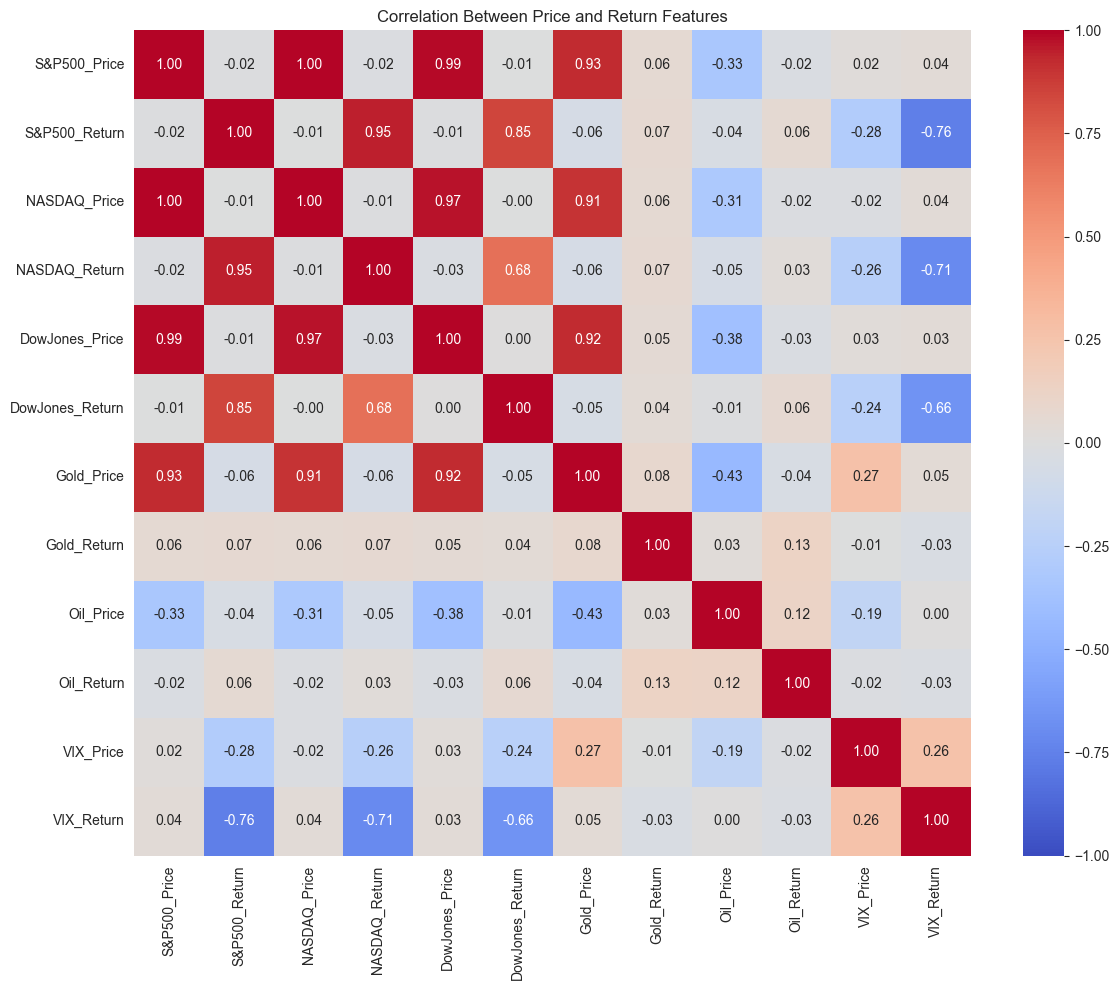

In [32]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df[price_returns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Between Price and Return Features')
plt.tight_layout()
plt.show()

In [33]:
df.drop(['S&P500_Price','NASDAQ_Price','DowJones_Price','VIX_Price','Oil_Price','Gold_Price','DowJones_Return','NASDAQ_Return'],axis=1,inplace=True)

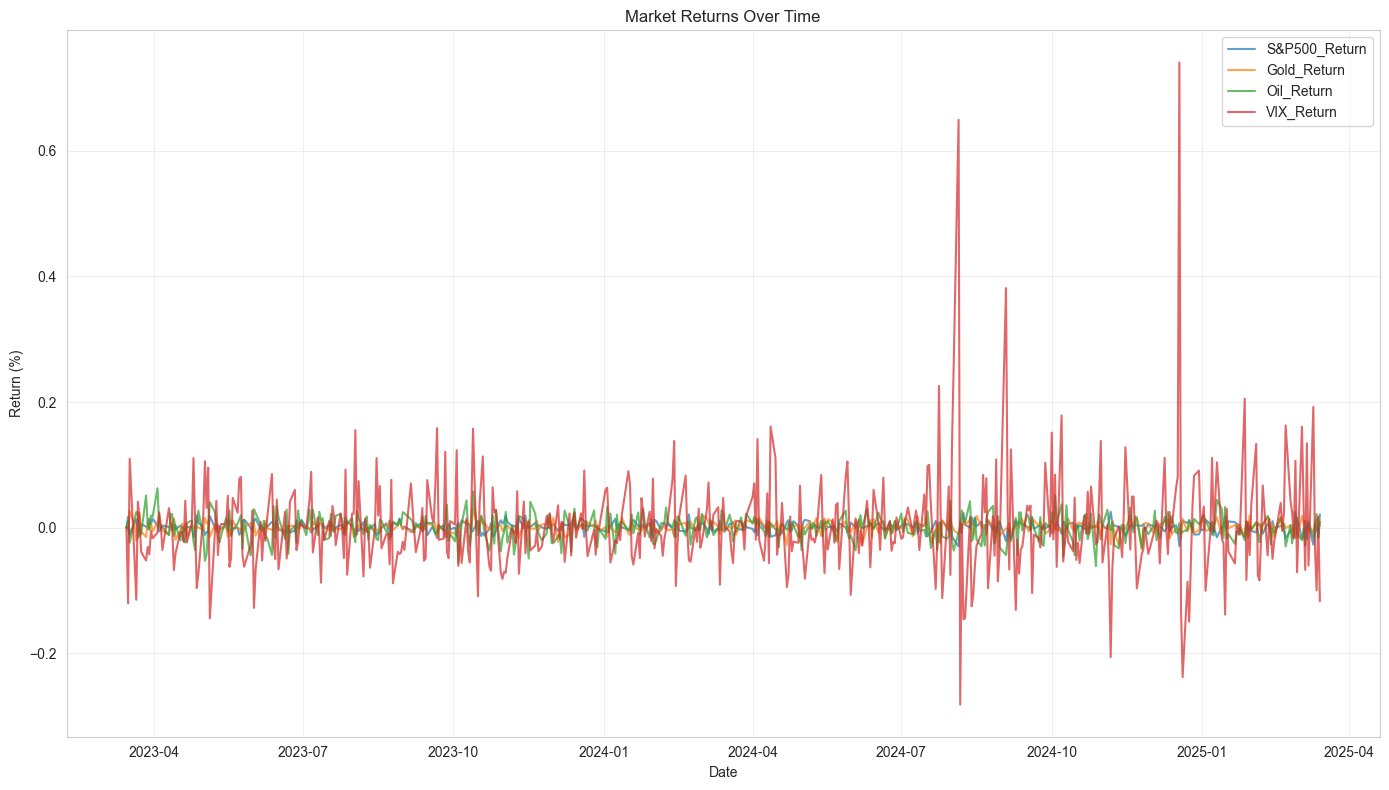

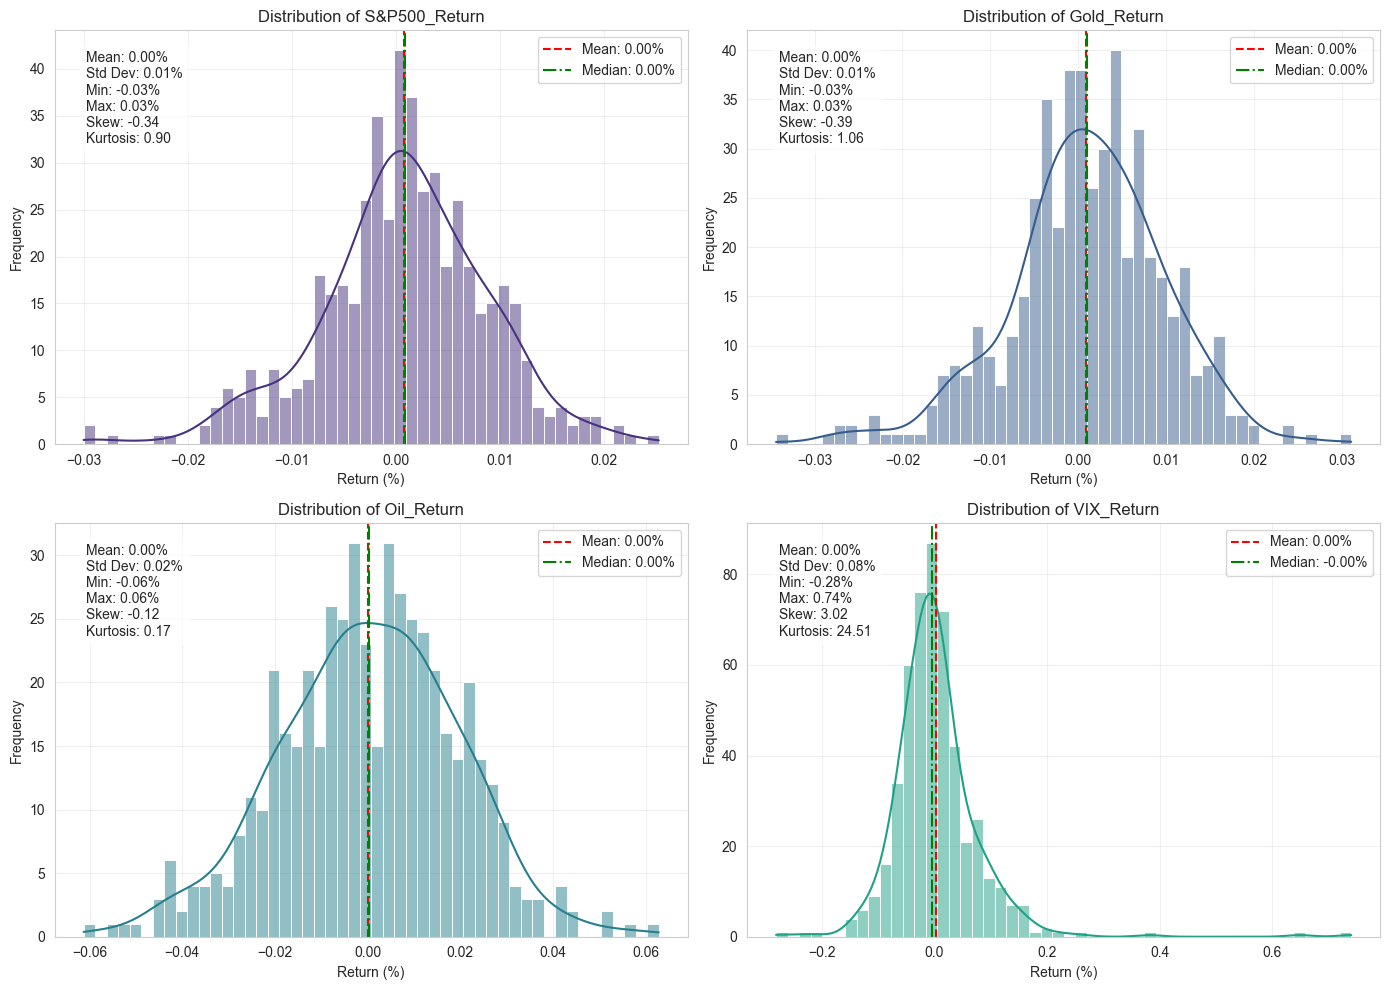

In [34]:

# Define the features to visualize
market_returns = ['S&P500_Return', 'Gold_Return', 'Oil_Return', 'VIX_Return']

# 1. Time series plot of returns
plt.figure(figsize=(14, 8))
for feature in market_returns:
    plt.plot(df.index, df[feature], label=feature, alpha=0.7)
plt.title('Market Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Distribution plots for each return series
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(market_returns):
    # Histogram with KDE
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i], bins=50, color=sns.color_palette("viridis")[i])
    
    # Add vertical lines for mean and median
    axes[i].axvline(df[feature].mean(), color='r', linestyle='--', label=f'Mean: {df[feature].mean():.2f}%')
    axes[i].axvline(df[feature].median(), color='g', linestyle='-.', label=f'Median: {df[feature].median():.2f}%')
    
    # Add statistics
    stats_text = (
        f"Mean: {df[feature].mean():.2f}%\n"
        f"Std Dev: {df[feature].std():.2f}%\n"
        f"Min: {df[feature].min():.2f}%\n"
        f"Max: {df[feature].max():.2f}%\n"
        f"Skew: {df[feature].skew():.2f}\n"
        f"Kurtosis: {df[feature].kurtosis():.2f}"
    )
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes, 
                 bbox=dict(facecolor='white', alpha=0.7), verticalalignment='top')
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Return (%)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
df.shape

(502, 50)

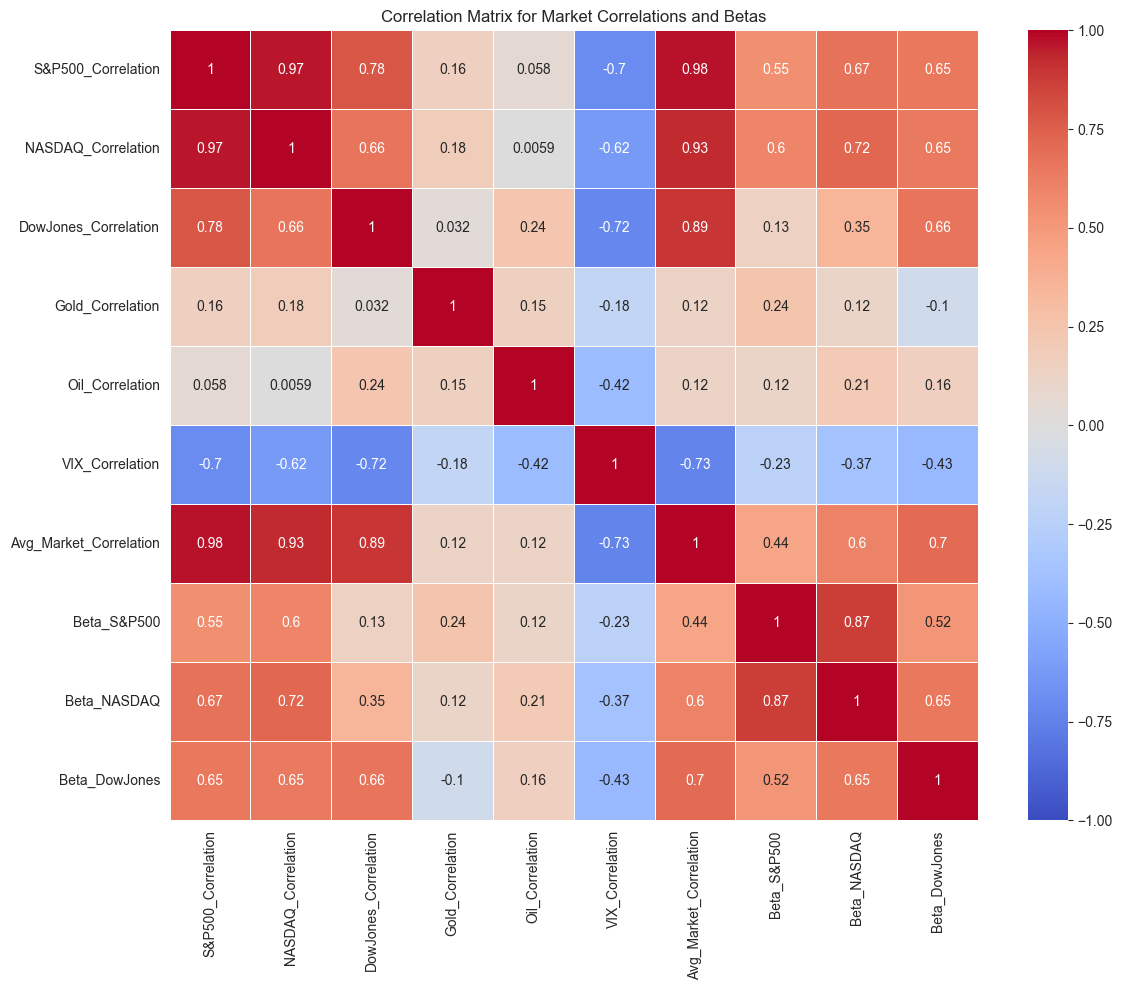

In [36]:

# Select only the correlation and beta columns
corr_beta_df = df[['S&P500_Correlation', 'NASDAQ_Correlation', 'DowJones_Correlation', 
                   'Gold_Correlation', 'Oil_Correlation', 'VIX_Correlation', 
                   'Avg_Market_Correlation', 'Beta_S&P500', 'Beta_NASDAQ', 'Beta_DowJones']]

correlation_matrix = corr_beta_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Market Correlations and Betas')
plt.tight_layout()
plt.show()

In [37]:
df.drop(['NASDAQ_Correlation','Avg_Market_Correlation','DowJones_Correlation','Beta_NASDAQ','Beta_DowJones'],axis=1,inplace=True)

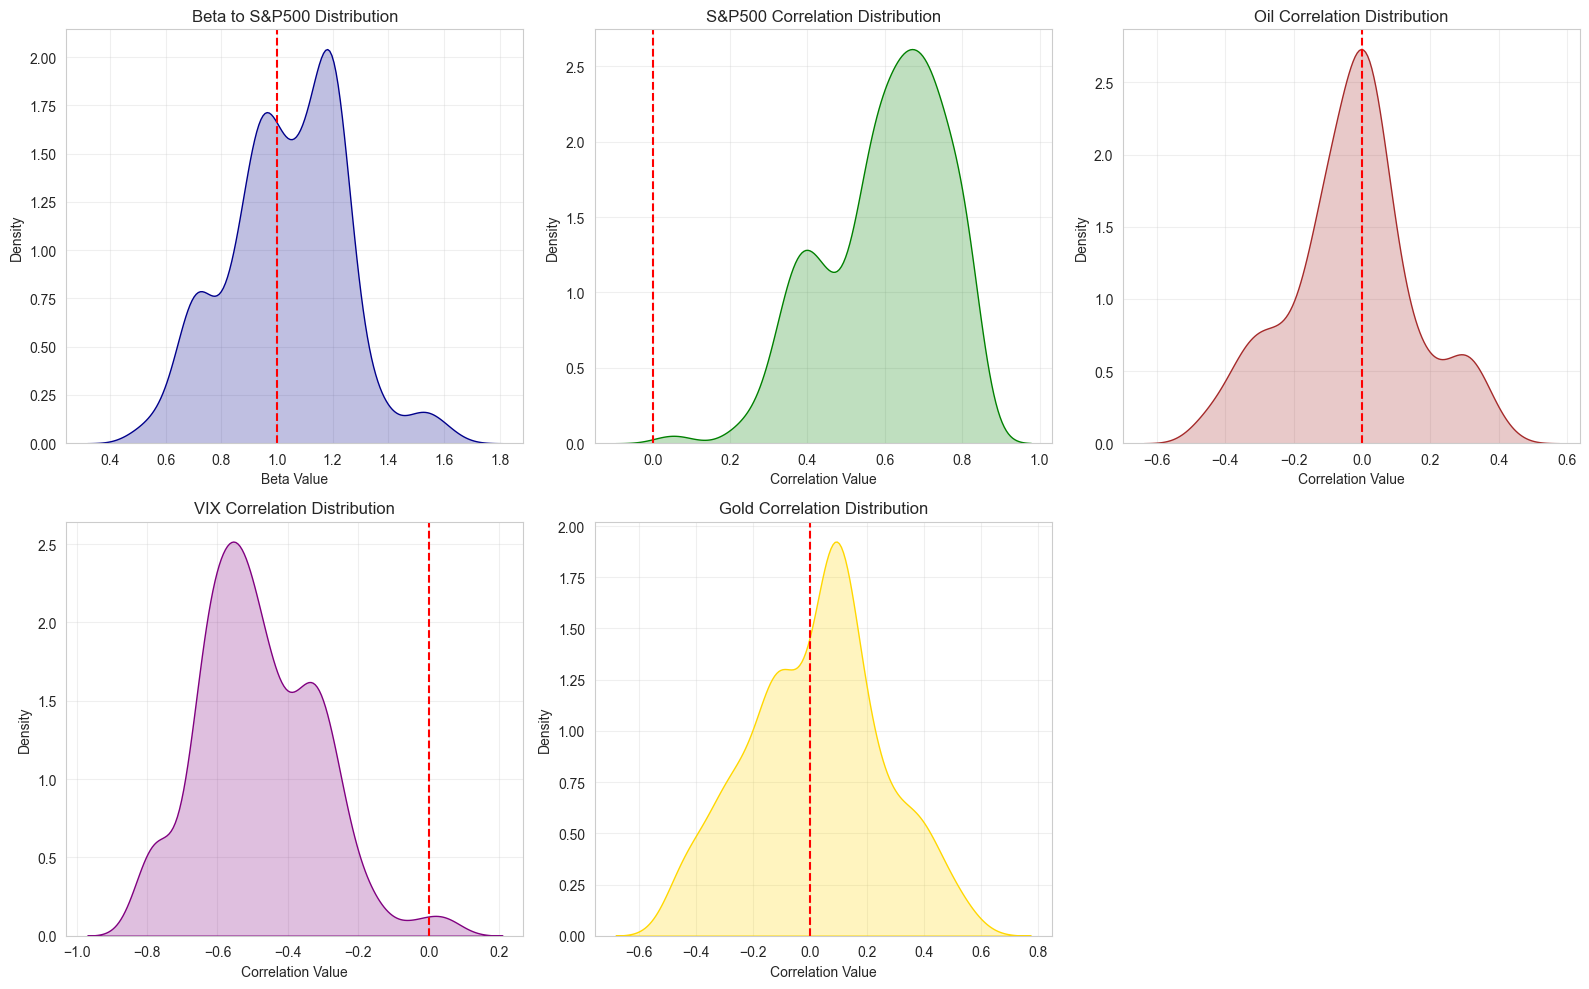

In [38]:
# Set up the figure for KDE plots
plt.figure(figsize=(16, 10))

# Create individual KDE plots for each metric
plt.subplot(2, 3, 1)
sns.kdeplot(df['Beta_S&P500'].dropna(), fill=True, color='darkblue')
plt.title('Beta to S&P500 Distribution')
plt.axvline(x=1, color='red', linestyle='--')  # Reference line at Beta = 1
plt.xlabel('Beta Value')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 2)
sns.kdeplot(df['S&P500_Correlation'].dropna(), fill=True, color='green')
plt.title('S&P500 Correlation Distribution')
plt.axvline(x=0, color='red', linestyle='--')  # Reference line at Correlation = 0
plt.xlabel('Correlation Value')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 3)
sns.kdeplot(df['Oil_Correlation'].dropna(), fill=True, color='brown')
plt.title('Oil Correlation Distribution')
plt.axvline(x=0, color='red', linestyle='--')  # Reference line at Correlation = 0
plt.xlabel('Correlation Value')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 4)
sns.kdeplot(df['VIX_Correlation'].dropna(), fill=True, color='purple')
plt.title('VIX Correlation Distribution')
plt.axvline(x=0, color='red', linestyle='--')  # Reference line at Correlation = 0
plt.xlabel('Correlation Value')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 5)
sns.kdeplot(df['Gold_Correlation'].dropna(), fill=True, color='gold')
plt.title('Gold Correlation Distribution')
plt.axvline(x=0, color='red', linestyle='--')  # Reference line at Correlation = 0
plt.xlabel('Correlation Value')
plt.grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

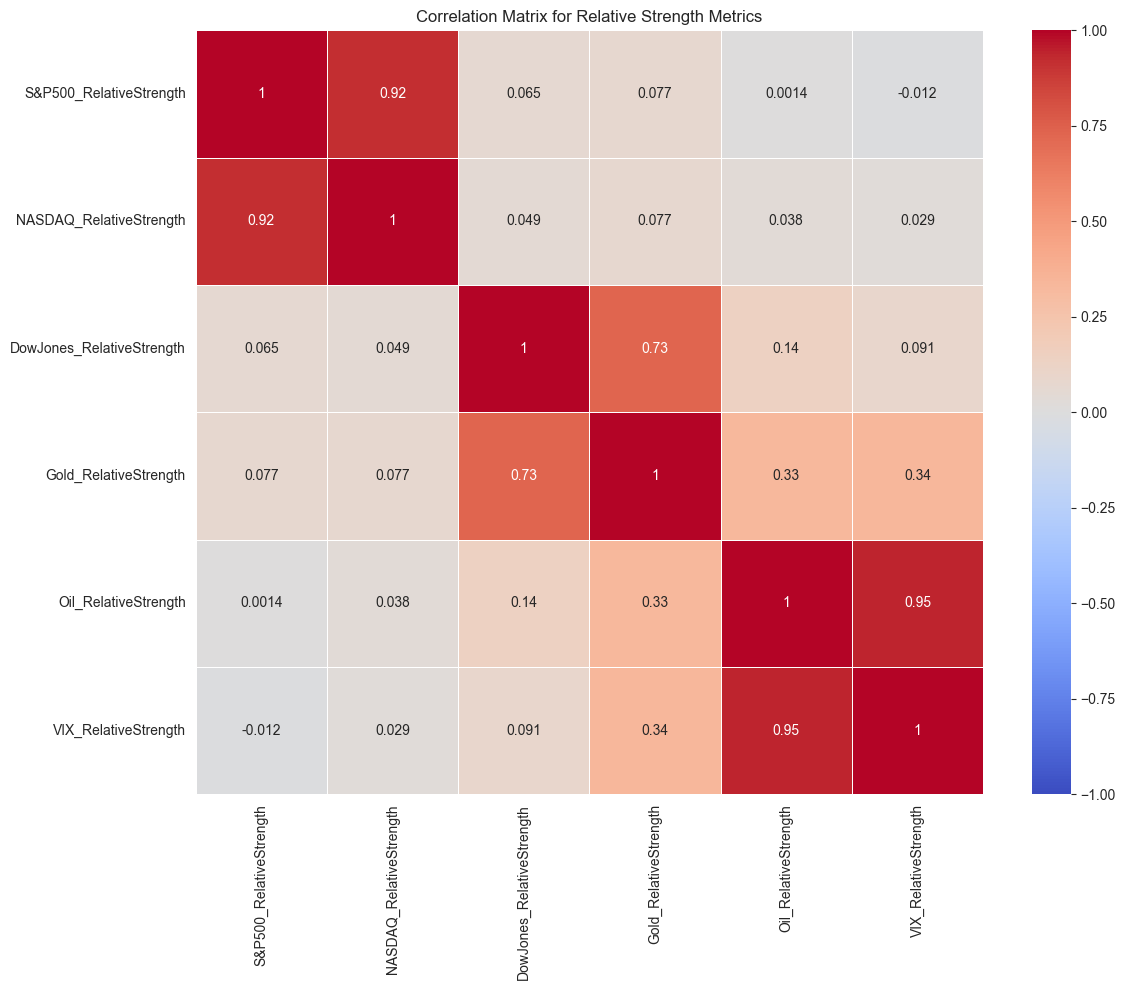

In [39]:
relative_df = df[['S&P500_RelativeStrength', 'NASDAQ_RelativeStrength', 
                 'DowJones_RelativeStrength', 'Gold_RelativeStrength', 
                 'Oil_RelativeStrength', 'VIX_RelativeStrength']]

# Calculate correlation matrix
rs_correlation_matrix = relative_df.corr()

# Visualize with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(rs_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Relative Strength Metrics')
plt.tight_layout()
plt.show()

In [40]:
df.drop(['NASDAQ_RelativeStrength','Oil_RelativeStrength'],axis=1,inplace=True)

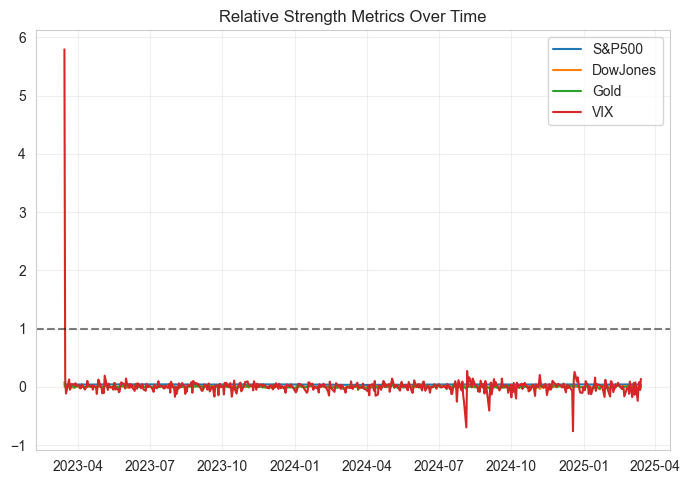

In [41]:
remaining_rs = ['S&P500_RelativeStrength', 'DowJones_RelativeStrength', 
                'Gold_RelativeStrength', 'VIX_RelativeStrength']

# Create a figure with multiple subplots
fig = plt.figure(figsize=(18, 12))

# 1. Time series plot of all metrics together
ax1 = plt.subplot(2, 2, 1)
for col in remaining_rs:
    ax1.plot(df.index, df[col], label=col.replace('_RelativeStrength', ''))
ax1.set_title('Relative Strength Metrics Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=1, color='black', linestyle='--', alpha=0.5) 

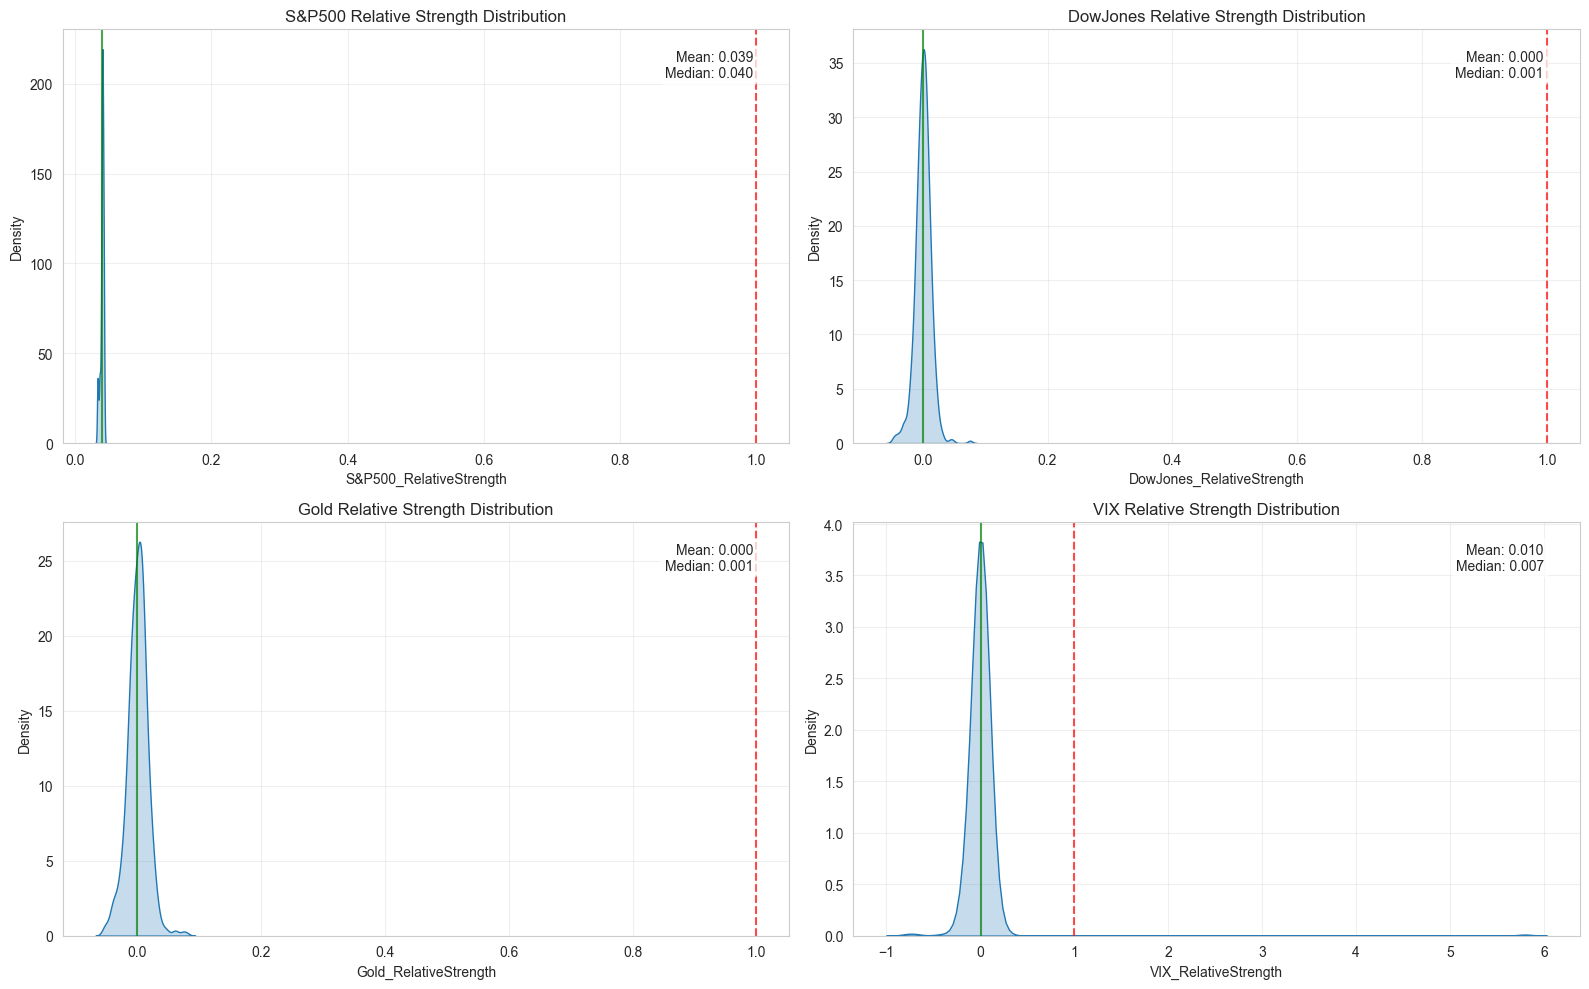

In [42]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(remaining_rs):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.axvline(x=1, color='red', linestyle='--', alpha=0.7)
    plt.title(f'{col.replace("_RelativeStrength", "")} Relative Strength Distribution')
    plt.grid(True, alpha=0.3)
    
    # Add some statistical information
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(x=mean_val, color='green', linestyle='-', alpha=0.7)
    plt.text(0.95, 0.95, f'Mean: {mean_val:.3f}\nMedian: {median_val:.3f}', 
             transform=plt.gca().transAxes, ha='right', va='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

In [43]:
df.drop(['S&P500_RelativeStrength', 'DowJones_RelativeStrength', 
                'Gold_RelativeStrength', 'VIX_RelativeStrength'],axis=1,inplace=True)

In [44]:
df.shape

(502, 39)

In [45]:
f = ['PE_Ratio','EPS','ROE']
for i in f:
    print(df[i].value_counts())

PE_Ratio
106.6612    2
110.1336    2
136.5754    2
158.7720    2
112.2287    2
           ..
123.6282    1
121.8671    1
120.1128    1
120.7384    1
88.9542     1
Name: count, Length: 497, dtype: int64
EPS
1.26    64
1.64    64
1.46    63
1.53    63
1.40    63
1.52    62
2.18    61
2.40    50
1.88    12
Name: count, dtype: int64
ROE
0.0001    502
Name: count, dtype: int64


In [46]:
df.drop('ROE',axis=1,inplace=True)

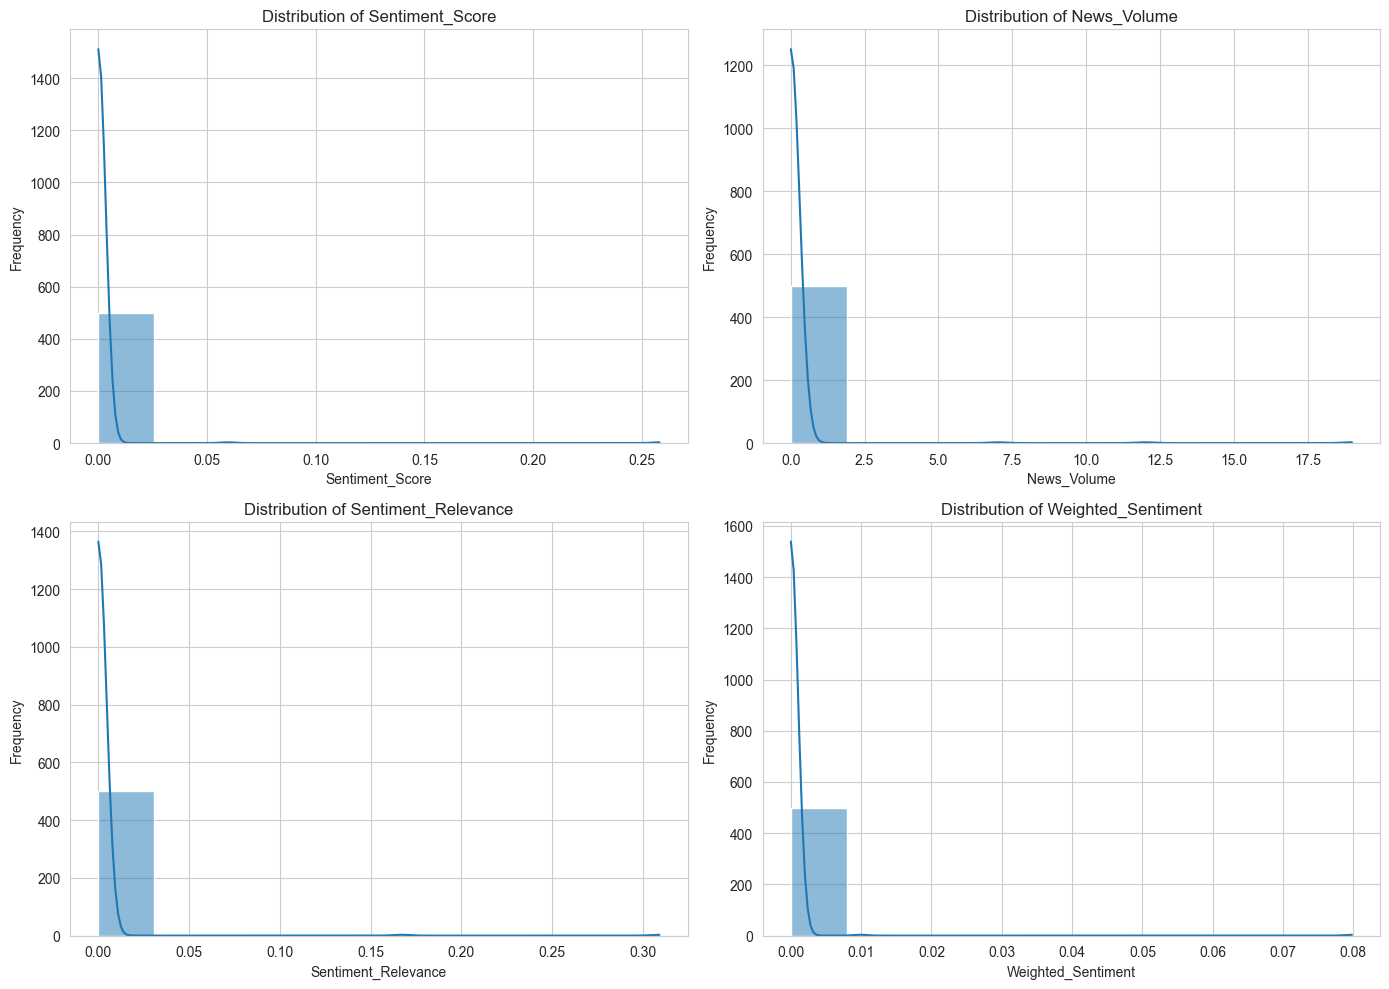

In [47]:
sentiment_features = df[['Sentiment_Score', 'News_Volume', 'Sentiment_Relevance', 'Weighted_Sentiment']]
plt.figure(figsize=(14, 10))

# Create histograms for each sentiment feature
for i, feature in enumerate(sentiment_features.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(sentiment_features[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [48]:
for i in sentiment_features.columns:
    print(df[i].value_counts())

Sentiment_Score
0.0000    500
0.0594      1
0.2581      1
Name: count, dtype: int64
News_Volume
0     499
19      1
12      1
7       1
Name: count, dtype: int64
Sentiment_Relevance
0.0000    500
0.1672      1
0.3091      1
Name: count, dtype: int64
Weighted_Sentiment
0.0000    500
0.0099      1
0.0798      1
Name: count, dtype: int64


In [49]:
df.drop(['Sentiment_Score', 'News_Volume', 'Sentiment_Relevance', 'Weighted_Sentiment'],axis=1,inplace=True)

In [50]:
df.shape

(502, 34)

In [51]:
df.isnull().sum()

Low                       0
Close                     0
Volume                    0
Dividends                 0
RSI_14                    0
MACD                      0
MACD_Signal               0
ROC_10                    0
S&P500_Return             0
S&P500_Correlation        0
Beta_S&P500               0
Gold_Return               0
Gold_Correlation          0
Oil_Return                0
Oil_Correlation           0
VIX_Return                0
VIX_Correlation           0
PE_Ratio                  0
EPS                       0
MA                        0
BB_Width                  0
TR                        0
Adaptive_ATR_Pct          0
returns                   1
log_returns               1
open_to_close             0
daily_volatility          0
high_to_close             0
log_valuation             0
EMA_12_pct                0
EMA_26_pct                0
Adaptive_BB_Middle_pct    0
Daily_Return              1
Abs_Return                1
dtype: int64

In [52]:
df.drop('returns',axis=1,inplace=True)

In [53]:
n = ['log_returns','Daily_Return','Abs_Return']
for i in n:
    df[i] = df[i].fillna(0)

In [54]:
df.isnull().sum()

Low                       0
Close                     0
Volume                    0
Dividends                 0
RSI_14                    0
MACD                      0
MACD_Signal               0
ROC_10                    0
S&P500_Return             0
S&P500_Correlation        0
Beta_S&P500               0
Gold_Return               0
Gold_Correlation          0
Oil_Return                0
Oil_Correlation           0
VIX_Return                0
VIX_Correlation           0
PE_Ratio                  0
EPS                       0
MA                        0
BB_Width                  0
TR                        0
Adaptive_ATR_Pct          0
log_returns               0
open_to_close             0
daily_volatility          0
high_to_close             0
log_valuation             0
EMA_12_pct                0
EMA_26_pct                0
Adaptive_BB_Middle_pct    0
Daily_Return              0
Abs_Return                0
dtype: int64

In [ ]:
output_path = 'D:\\Finplat\\data\\processed\\AAPL_final.csv'
df.to_csv(output_path, 
          index=True,           # Keep the date index
          float_format='%.4f',  # Limit decimal places for floats
          encoding='utf-8')     # Specify encoding

print(f"Final data saved to {output_path}")

Final data saved to D:\Finplat\data\processed\AAPL_final.csv


In [ ]:
df.shape

(502, 33)